In [3]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '/home/jw3514/Work/ASD_Circuits/src')
from ASD_Circuits import *
from tabulate import tabulate
#from brokenaxes import brokenaxes
import zipfile
HGNC, ENSID2Entrez, GeneSymbol2Entrez, Entrez2Symbol = LoadGeneINFO()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# Circuit STR data
ASD_CircuitsSet = pd.read_csv(
    "/home/jw3514/Work/ASD_Circuits/notebooks/ASD.SA.Circuits.Size46.csv",
    index_col="idx")
ASD_Circuits = ASD_CircuitsSet.loc[3, "STRs"].split(";")
RealSibSTRs = pd.read_csv("../dat/Unionize_bias/sib.top61.Z2.csv", 
                          index_col="STR").head(46).index.values

In [5]:
adj_mat = pd.read_csv("../dat/allen-mouse-conn/ScoreingMat_jw_v3/WeightMat.Ipsi.csv", index_col=0)
dist_mat = pd.read_csv("../dat/allen-mouse-conn/Dist_CartesianDistance.ipsi.csv", index_col=0)
dist_mat.columns = dist_mat.index.values

In [6]:
def MaskDistMat(Mat1, Mat2, cutoff, m='lt'):
    New_Mat2 = Mat2.copy(deep=True)
    for STR_i in Mat1.index.values:
        for STR_j in Mat1.columns.values:
            if m == 'gt':
                if Mat1.loc[STR_i, STR_j] >= cutoff:
                    New_Mat2.loc[STR_i, STR_j] = 0
                else:
                    New_Mat2.loc[STR_i, STR_j] = Mat2.loc[STR_i, STR_j]
            elif m == "lt":
                if Mat1.loc[STR_i, STR_j] <= cutoff:
                    New_Mat2.loc[STR_i, STR_j] = 0
                else:
                    New_Mat2.loc[STR_i, STR_j] = Mat2.loc[STR_i, STR_j]
    return New_Mat2

def MaskDistMat_xx(distance_mat, Conn_mat, cutoff, cutoff2, keep='gt'):
    Conn_mat_new = Conn_mat.copy(deep=True)
    distance_mat_new = distance_mat.copy(deep=True)
    for STR_i in distance_mat.index.values:
        for STR_j in distance_mat.columns.values:
            if keep == 'gt':
                if distance_mat.loc[STR_i, STR_j] >= cutoff:
                    Conn_mat_new.loc[STR_i, STR_j] = Conn_mat.loc[STR_i, STR_j]
                    distance_mat_new.loc[STR_i, STR_j] = distance_mat.loc[STR_i, STR_j]
                else:
                    Conn_mat_new.loc[STR_i, STR_j] = 0
                    distance_mat_new.loc[STR_i, STR_j] = 0
            elif keep == "lt":
                if distance_mat.loc[STR_i, STR_j] <= cutoff:
                    Conn_mat_new.loc[STR_i, STR_j] = Conn_mat.loc[STR_i, STR_j]
                    distance_mat_new.loc[STR_i, STR_j] = distance_mat.loc[STR_i, STR_j]
                else:
                    Conn_mat_new.loc[STR_i, STR_j] = 0
                    distance_mat_new.loc[STR_i, STR_j] = 0   
            elif keep=="bw":
                if distance_mat.loc[STR_i, STR_j] >= cutoff and distance_mat.loc[STR_i, STR_j] <= cutoff2:
                    Conn_mat_new.loc[STR_i, STR_j] = Conn_mat.loc[STR_i, STR_j]
                    distance_mat_new.loc[STR_i, STR_j] = distance_mat.loc[STR_i, STR_j]
                else:
                    Conn_mat_new.loc[STR_i, STR_j] = 0
                    distance_mat_new.loc[STR_i, STR_j] = 0   
    return Conn_mat_new, distance_mat_new

def MaskDistMat_xy(distance_mat, Conn_mat, cutoff, cutoff2, keep='gt'):
    Conn_mat_new = Conn_mat.copy(deep=True)
    distance_mat_new = distance_mat.copy(deep=True)
    for STR_i in distance_mat.index.values:
        for STR_j in distance_mat.columns.values:
            if STR_i == STR_j:
                Conn_mat_new.loc[STR_i, STR_j] = 0
                distance_mat_new.loc[STR_i, STR_j] = 0
                continue
            if keep == 'gt':
                if distance_mat.loc[STR_i, STR_j] >= cutoff:
                    Conn_mat_new.loc[STR_i, STR_j] = Conn_mat.loc[STR_i, STR_j]
                    distance_mat_new.loc[STR_i, STR_j] = distance_mat.loc[STR_i, STR_j]
                else:
                    Conn_mat_new.loc[STR_i, STR_j] = 0
                    distance_mat_new.loc[STR_i, STR_j] = 0
            elif keep == "lt":
                if distance_mat.loc[STR_i, STR_j] <= cutoff:
                    Conn_mat_new.loc[STR_i, STR_j] = Conn_mat.loc[STR_i, STR_j]
                    distance_mat_new.loc[STR_i, STR_j] = distance_mat.loc[STR_i, STR_j]
                else:
                    Conn_mat_new.loc[STR_i, STR_j] = 0
                    distance_mat_new.loc[STR_i, STR_j] = 0
            elif keep=="bw":
                if distance_mat.loc[STR_i, STR_j] >= cutoff and distance_mat.loc[STR_i, STR_j] <= cutoff2:
                    Conn_mat_new.loc[STR_i, STR_j] = Conn_mat.loc[STR_i, STR_j]
                    distance_mat_new.loc[STR_i, STR_j] = distance_mat.loc[STR_i, STR_j]
                else:
                    Conn_mat_new.loc[STR_i, STR_j] = 0
                    distance_mat_new.loc[STR_i, STR_j] = 0
    return Conn_mat_new, distance_mat_new

In [7]:
Cartesian_distances_w_edge = MaskDistMat(adj_mat, dist_mat, cutoff=0)
#Distance_Cuts = [0, 1000, 2000, 3000, 4000, 5000, 100000]
Distance_Cuts = [0, 1000, 2000, 3000, 4000, 100000]

N_Connections_total = []
N_Pairs_total = []
Cutted_DistMat = {}
Cutted_AdjMat = {}
for i, cut in enumerate(Distance_Cuts[:-1]):
    Conn_mat_new, distance_mat_new = MaskDistMat_xy(dist_mat, adj_mat, keep="bw",
                                                cutoff=Distance_Cuts[i], cutoff2=Distance_Cuts[i+1])
    Cutted_DistMat[i] = distance_mat_new
    Cutted_AdjMat[i] = Conn_mat_new
    N_Connections_total.append(np.count_nonzero(Conn_mat_new))
    N_Pairs_total.append(np.count_nonzero(distance_mat_new))
N_Connections_total = np.array(N_Connections_total)
N_Pairs_total = np.array(N_Pairs_total)

In [8]:
N_Connections_total, N_Pairs_total

(array([162, 827, 813, 609, 652]), array([  848,  4390,  7930,  9530, 22458]))

In [9]:
162 + 827 + 813 + 609 + 652

3063

In [10]:
ASD_Circuits = ASD_CircuitsSet.loc[3, "STRs"].split(";")
ASD_Connections = []
ASD_Pairs = []
for i,v in enumerate(Distance_Cuts[:-1]):
    adj_mat_ = Cutted_AdjMat[i]
    dist_mat_ = Cutted_DistMat[i]
    adj_mat_asd = adj_mat_.loc[ASD_Circuits,ASD_Circuits]
    dist_mat_asd = dist_mat_.loc[ASD_Circuits,ASD_Circuits]
    Nconn = np.count_nonzero(adj_mat_asd)
    Npair = np.count_nonzero(dist_mat_asd)
    ASD_Connections.append(Nconn)
    ASD_Pairs.append(Npair)

ASD_Connections = np.array(ASD_Connections)
ASD_Pairs = np.array(ASD_Pairs)

ASD_Connections/ASD_Pairs

array([0.27419355, 0.26106195, 0.2029703 , 0.15567766, 0.11298077])

In [11]:
ASD_Connections, ASD_Pairs

(array([17, 59, 82, 85, 94]), array([ 62, 226, 404, 546, 832]))

In [12]:
SIB_Connections = []
SIB_Pairs = []
for i,v in enumerate(Distance_Cuts[:-1]):
    adj_mat_ = Cutted_AdjMat[i]
    dist_mat_ = Cutted_DistMat[i]
    adj_mat_sib = adj_mat_.loc[RealSibSTRs,RealSibSTRs]
    dist_mat_sib = dist_mat_.loc[RealSibSTRs,RealSibSTRs]
    Nconn = np.count_nonzero(adj_mat_sib)
    Npair = np.count_nonzero(dist_mat_sib)
    SIB_Connections.append(Nconn)
    SIB_Pairs.append(Npair)

SIB_Connections = np.array(SIB_Connections)
SIB_Pairs = np.array(SIB_Pairs)

SIB_Connections/SIB_Pairs

array([0.14285714, 0.11790393, 0.05614035, 0.04417671, 0.03703704])

In [13]:
SIB_Connections, SIB_Pairs

(array([16, 54, 32, 22, 16]), array([112, 458, 570, 498, 432]))

In [11]:
subsib_connections = []
subsib_Pairs = []
Sim_dir = "../dat/Unionize_bias/SubSampleSib//"
for file in os.listdir(Sim_dir):
    if file.startswith("cont.genes"):
        continue
    df = pd.read_csv(Sim_dir+file, index_col="STR")
    _SibSTRs = df.head(46).index.values
    _SIB_Connections = []
    _SIB_Pairs = []
    for i,v in enumerate(Distance_Cuts[:-1]):
        adj_mat_ = Cutted_AdjMat[i]
        dist_mat_ = Cutted_DistMat[i]
        adj_mat_sib = adj_mat_.loc[_SibSTRs,_SibSTRs]
        dist_mat_sib = dist_mat_.loc[_SibSTRs,_SibSTRs]
        Nconn = np.count_nonzero(adj_mat_sib)
        Npair = np.count_nonzero(dist_mat_sib)
        _SIB_Connections.append(Nconn)
        _SIB_Pairs.append(Npair)
    subsib_connections.append(_SIB_Connections)
    subsib_Pairs.append(_SIB_Pairs)
subsib_connections = np.array(subsib_connections)
subsib_Pairs = np.array(subsib_Pairs)

In [12]:
subsib_connections.shape

(10000, 6)

In [13]:
subsib_conns_mean =  np.mean(subsib_connections, axis=0)
subsib_conns_std =  np.std(subsib_connections, axis=0)
subsib_pairs_mean =  np.mean(subsib_Pairs, axis=0)
subsib_pairs_std =  np.std(subsib_Pairs, axis=0)

In [14]:
subsib_conns_mean

array([15.302 , 56.5777, 42.451 , 25.5952,  9.9275,  5.6094])

In [15]:
subsib_pairs_mean

array([103.2564, 364.3568, 444.3224, 414.6686, 320.4714, 422.9244])

In [16]:
#subsib_connections/subsib_Pairs
#subsib_pairs_std =  np.std(subsib_connections/subsib_Pairs, axis=0)

In [17]:
subsib_pairs_std

array([ 41.94981596, 112.33198251,  86.99705316,  72.54758283,
        65.18478796, 174.91000625])

In [18]:
ASD_Connections/N_Connections_total

array([0.10493827, 0.0713422 , 0.10086101, 0.13957307, 0.15759312,
       0.12871287])

In [19]:
SIB_Connections/N_Connections_total

array([0.09876543, 0.06529625, 0.03936039, 0.03612479, 0.03151862,
       0.01650165])

/tmp/ipykernel_49260/1823101078.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
/tmp/ipykernel_49260/1823101078.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_49260/1823101078.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,0].set_xticklabels(["", "

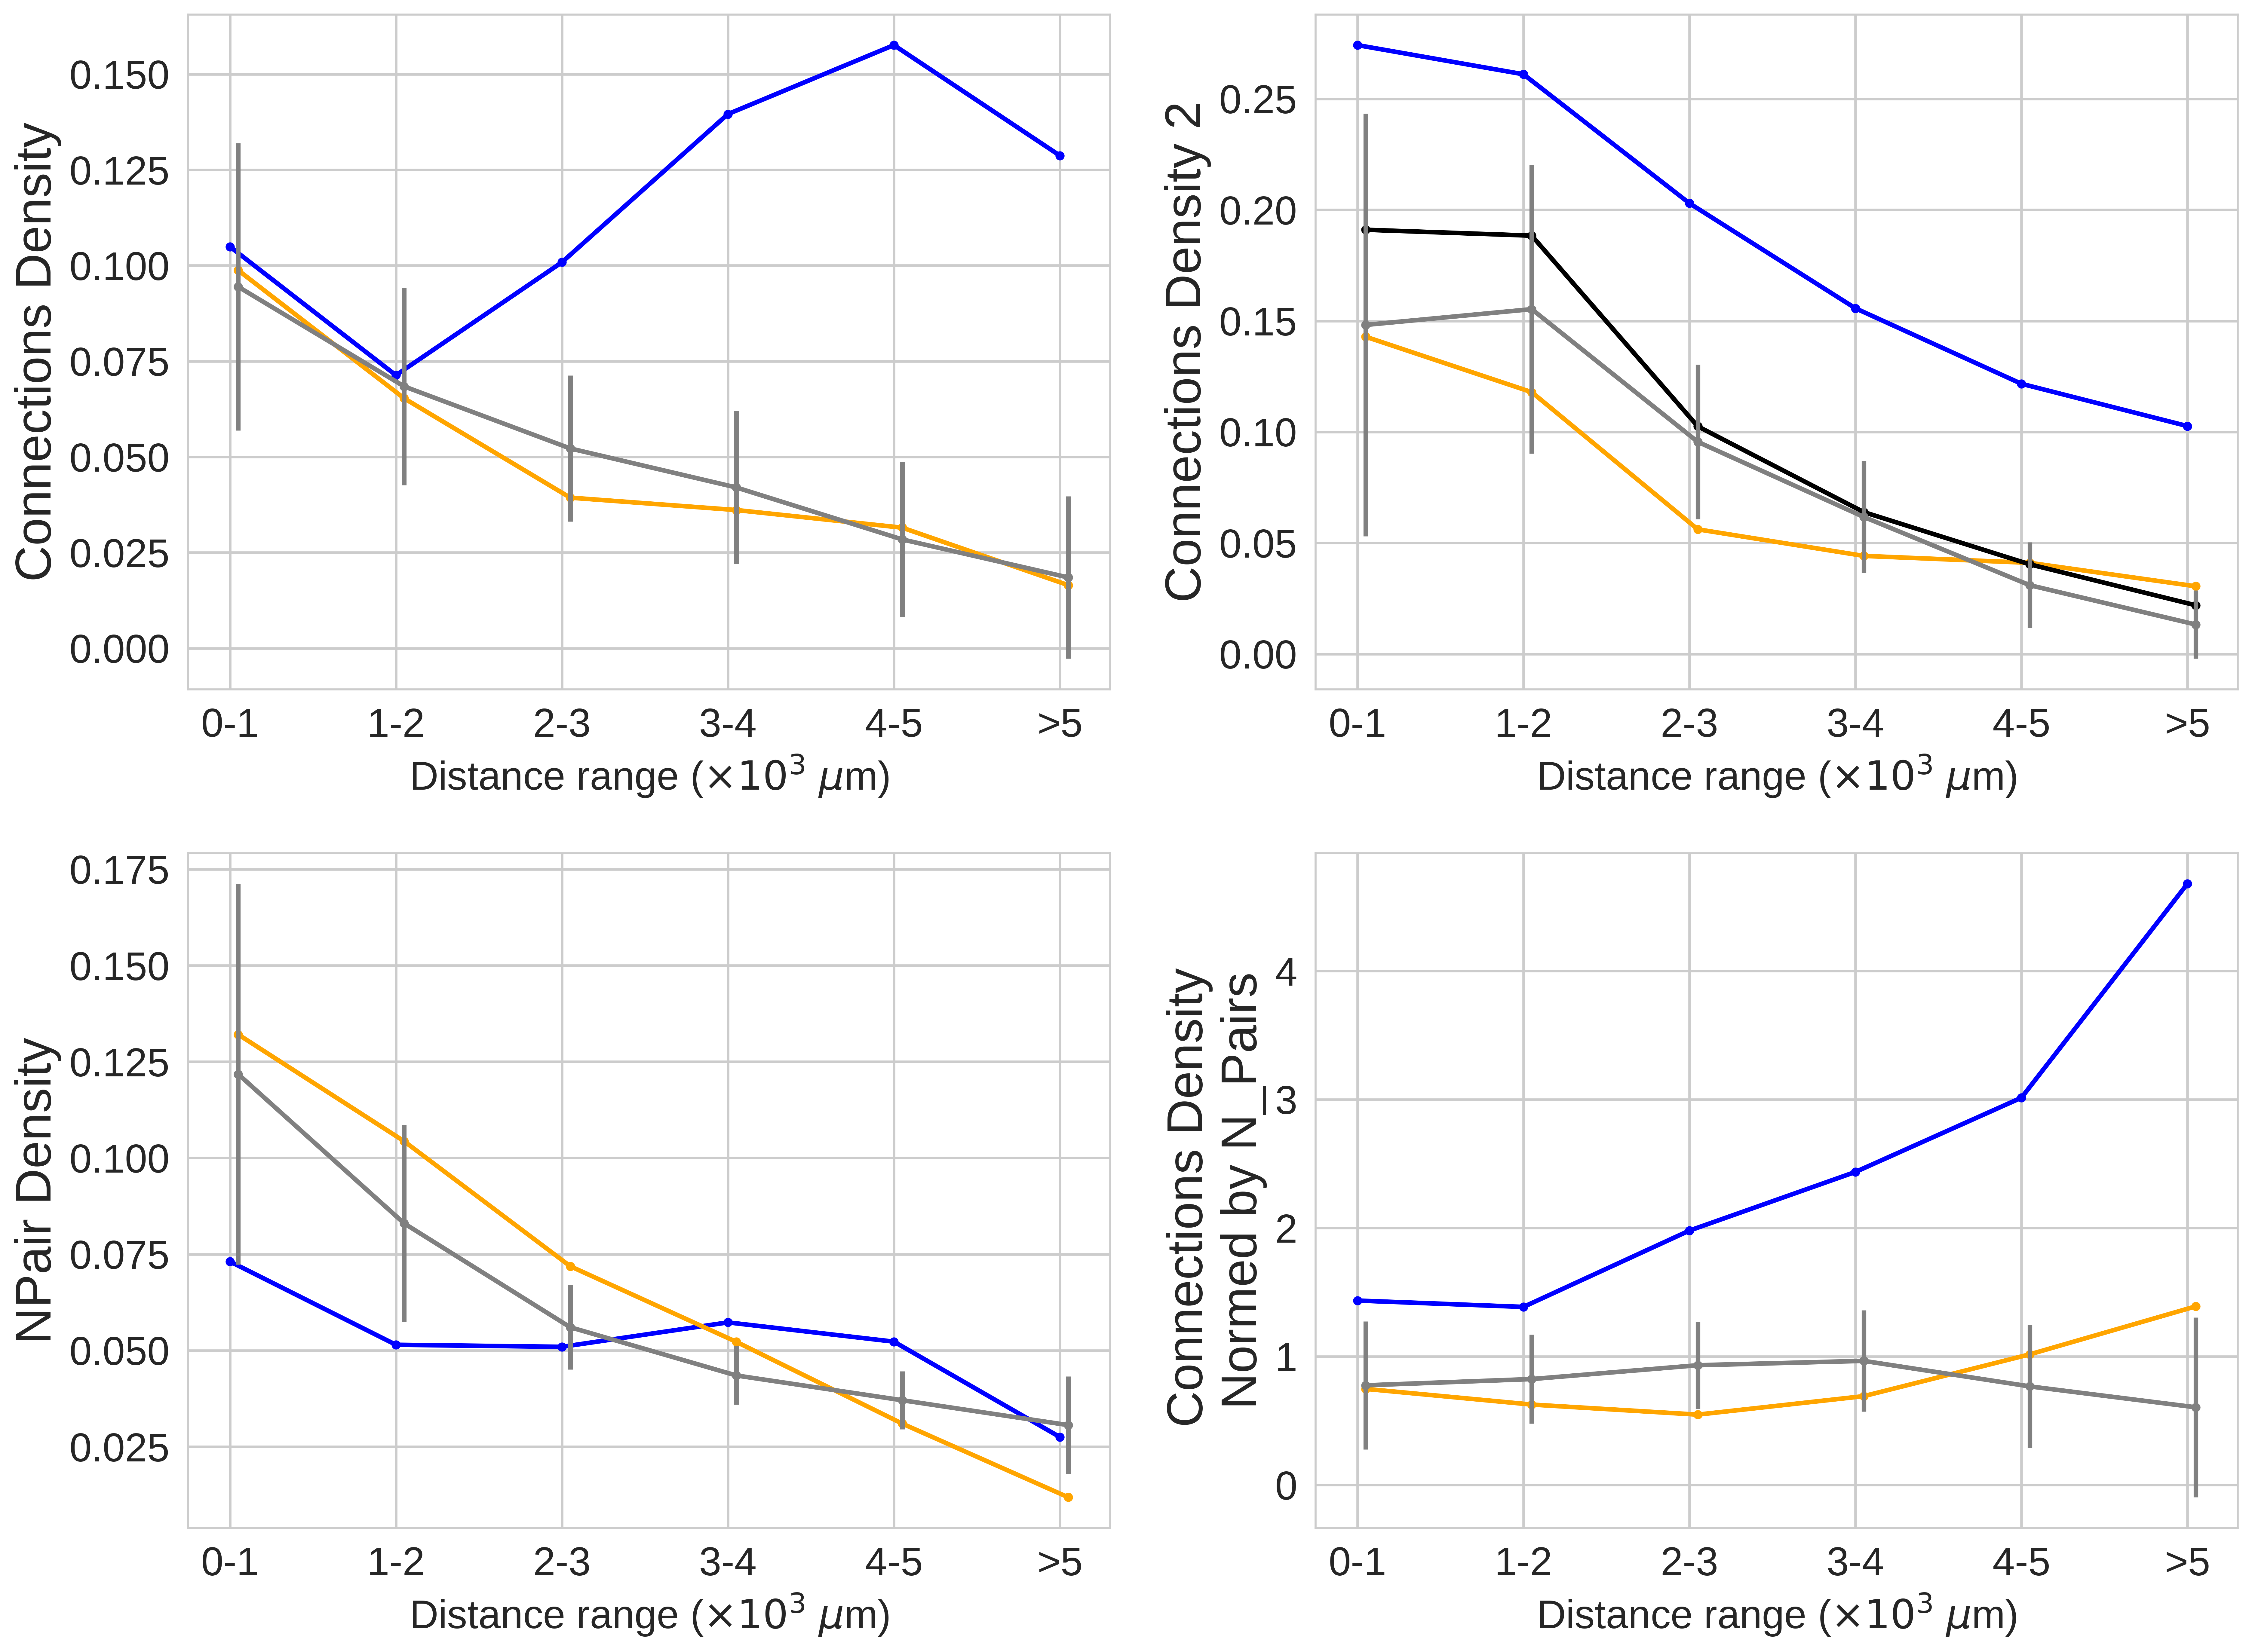

In [20]:
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import matplotlib.ticker as mticker  
plt.style.use('seaborn-talk')
matplotlib.rcParams.update({'font.size': 25})
fig, ax = plt.subplots(2,2,dpi=480, figsize=(16,12))

ax[0,0].plot(np.arange(6), ASD_Connections/N_Connections_total, marker="." , color="blue")
ax[0,0].plot(np.arange(6) + 0.05, SIB_Connections/N_Connections_total, marker=".", color="orange")
ax[0,0].errorbar(np.arange(6) + 0.05, 
                 subsib_conns_mean/N_Connections_total, 
                 yerr= np.nanstd(subsib_connections/N_Connections_total, axis=0), #subsib_conns_std/N_Connections_total,
                 marker=".", color="grey")

ax[0,0].grid(True)
ax[0,0].legend(loc="upper right", fontsize=20)
ax[0,0].set_ylabel("Connections Density", fontsize=25)
ax[0,0].set_xlabel(r"Distance range ($\times 10^3$ $\mu$m)", fontsize=20)
ax[0,0].set_xticklabels(["", "0-1", "1-2", "2-3", "3-4", "4-5", r">5"], fontsize=20)
ax[0,0].tick_params(axis='y', labelsize=20)

ax[0,1].plot(np.arange(6), ASD_Connections/ASD_Pairs, marker="." , color="blue")
ax[0,1].plot(np.arange(6) + 0.05, SIB_Connections/SIB_Pairs, marker=".", color="orange")
ax[0,1].plot(np.arange(6) + 0.05, N_Connections_total/N_Pairs_total, marker=".", color="black")
ax[0,1].errorbar(np.arange(6) + 0.05, 
                 subsib_conns_mean/subsib_pairs_mean, 
                 yerr= np.nanstd(subsib_connections/subsib_Pairs, axis=0),#subsib_conns_std/subsib_pairs_mean,
                 marker=".", color="grey")

ax[0,1].grid(True)
ax[0,1].legend(loc="upper right", fontsize=20)
ax[0,1].set_ylabel("Connections Density 2", fontsize=25)
ax[0,1].set_xlabel(r"Distance range ($\times 10^3$ $\mu$m)", fontsize=20)
ax[0,1].set_xticklabels(["", "0-1", "1-2", "2-3", "3-4", "4-5", r">5"], fontsize=20)
ax[0,1].tick_params(axis='y', labelsize=20)

ax[1,0].plot(np.arange(6), ASD_Pairs/N_Pairs_total, marker="." , color="blue")
ax[1,0].plot(np.arange(6) + 0.05, SIB_Pairs/N_Pairs_total, marker=".", color="orange")
ax[1,0].errorbar(np.arange(6) + 0.05, 
                 subsib_pairs_mean/N_Pairs_total, 
                 yerr= np.nanstd(subsib_Pairs/N_Pairs_total, axis=0),#subsib_pairs_std/N_Pairs_total,
                 marker=".", color="grey")

ax[1,0].grid(True)
ax[1,0].legend(loc="upper right", fontsize=20)
ax[1,0].set_ylabel("NPair Density", fontsize=25)
ax[1,0].set_xlabel(r"Distance range ($\times 10^3$ $\mu$m)", fontsize=20)
ax[1,0].set_xticklabels(["", "0-1", "1-2", "2-3", "3-4", "4-5", r">5"], fontsize=20)
ax[1,0].tick_params(axis='y', labelsize=20)

norm = N_Connections_total/N_Pairs_total
ax[1,1].plot(np.arange(6), ASD_Connections/ASD_Pairs / norm , marker="." , color="blue")
ax[1,1].plot(np.arange(6) + 0.05, SIB_Connections/SIB_Pairs / norm, marker=".", color="orange")
ax[1,1].errorbar(np.arange(6) + 0.05, 
                 subsib_conns_mean/subsib_pairs_mean / norm, 
                 yerr= np.nanstd(subsib_connections/subsib_Pairs/norm, axis=0),
                 marker=".", color="grey")

ax[1,1].grid(True)
ax[1,1].legend(loc="upper right", fontsize=20)
ax[1,1].set_ylabel("Connections Density \nNormed by N_Pairs", fontsize=25)
ax[1,1].set_xlabel(r"Distance range ($\times 10^3$ $\mu$m)", fontsize=20)
ax[1,1].set_xticklabels(["", "0-1", "1-2", "2-3", "3-4", "4-5", r">5"], fontsize=20)
ax[1,1].tick_params(axis='y', labelsize=20)
#plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%s x1000'))
plt.tight_layout()
#fig.savefig("figs/n_Fig_4.A.pdf")

In [21]:
N_Connections_total

array([162, 827, 813, 609, 349, 303])

In [22]:
ASD_Connections/subsib_conns_mean

array([1.11096589, 1.04281369, 1.93163883, 3.32093518, 5.5401662 ,
       6.95261525])

In [23]:
# significance of connection enrichment:
for asd, sibs in zip(ASD_Connections, subsib_connections.T):
    #print(asd, len(sibs))
    z,p = GetPermutationP(sibs, asd)
    print(p)

0.35776422357764226
0.3921607839216078
0.016198380161983827
0.0009999000099990552
9.999000099991662e-05
0.002799720027997221


In [24]:
# significance of connection enrichment:
for asd, sibs in zip(ASD_Connections, subsib_connections.T):
    #print(asd, len(sibs))
    #z,p = GetPermutationP(sibs, asd)
    #print(p)
    print(np.mean(sibs))

15.302
56.5777
42.451
25.5952
9.9275
5.6094


##### Combine multiple distances

In [25]:
ASD_Connections

array([17, 59, 82, 85, 55, 39])

In [26]:
subsib_connections

array([[18, 53, 44, 31,  6,  2],
       [ 8, 65, 50, 33,  8, 11],
       [18, 73, 71, 25, 10,  0],
       ...,
       [15, 59, 43, 24,  8,  0],
       [20, 70, 46, 21,  5,  1],
       [13, 40, 45, 32, 12,  5]])

In [27]:
ASD_Group1 = np.sum(ASD_Connections[:2])
ASD_Group2 = np.sum(ASD_Connections[:2])
Cont_Group1 =
Cont_Group2 = 

SyntaxError: invalid syntax (2542233038.py, line 3)

In [28]:
ASD_Pairs

array([ 62, 226, 404, 546, 452, 380])

In [29]:
ASD_Pairs/subsib_pairs_mean

array([0.60044704, 0.62027112, 0.90924968, 1.31671412, 1.41042227,
       0.89850574])

In [30]:
# significance of connection pairs:
for asd, sibs in zip(ASD_Pairs, subsib_Pairs.T):
    #print(asd, len(sibs))
    z,p = GetPermutationP(sibs, asd)
    print(p)

0.8500149985001499
0.9149085091490851
0.6678332166783322
0.031796820317968155
0.024697530246975297
0.5806419358064194


In [31]:
(subsib_connections/subsib_Pairs / norm)

/tmp/ipykernel_49260/1111095590.py:1: RuntimeWarning: invalid value encountered in true_divide
  (subsib_connections/subsib_Pairs / norm)


array([[0.90598291, 1.0193558 , 1.73054795, 1.44377004, 0.61919771,
        0.10529044],
       [0.55100715, 0.96922   , 0.96383375, 1.17900443, 0.66491029,
        1.26640997],
       [0.82651072, 0.90118388, 1.17777861, 0.80829568, 0.90393826,
        0.        ],
       ...,
       [0.85346216, 0.96664278, 0.96640989, 1.04906844, 0.61919771,
        0.        ],
       [1.74485597, 1.3083945 , 0.9970753 , 0.73681769, 0.38699857,
        0.08939365],
       [1.00072622, 0.79824713, 1.01604141, 1.03036077, 0.71104043,
        0.56988449]])

In [32]:
(ASD_Connections/ASD_Pairs) / (subsib_conns_mean/subsib_pairs_mean)

array([1.85023126, 1.68122238, 2.12443169, 2.52213835, 3.92801951,
       7.73797535])

In [33]:
# significance of fc:
for asd, sibs in zip(ASD_Connections/ASD_Pairs / norm, (subsib_connections/subsib_Pairs / norm).T):
    #print(asd, len(sibs))
    z,p = GetPermutationP(sibs, asd)
    print(p)

0.15998400159984005
0.08139186081391858
0.009799020097990163
0.0023997600239975547
0.00039996000399955545
0.0018000000000000238


/tmp/ipykernel_49260/235142282.py:2: RuntimeWarning: invalid value encountered in true_divide
  for asd, sibs in zip(ASD_Connections/ASD_Pairs / norm, (subsib_connections/subsib_Pairs / norm).T):


In [34]:
CaseGroup1 = np.sum(ASD_Connections[:2])/np.sum(N_Connections_total[:2])
CaseGroup2 = np.sum(ASD_Connections[2:])/np.sum(N_Connections_total[2:])
CtrlGroup1 = np.sum(subsib_connections[:, :2], axis=1)/np.sum(N_Connections_total[:2])
CtrlGroup2 = np.sum(subsib_connections[:, 2:], axis=1)/np.sum(N_Connections_total[2:])

# significance of fc:
z,p = GetPermutationP(CtrlGroup1, CaseGroup1)
print(p)

z,p = GetPermutationP(CtrlGroup2, CaseGroup2)
print(p)

0.36646335366463356
9.999000099991662e-05


In [35]:
CaseGroup1,CaseGroup2

(0.07684529828109202, 0.12584378013500483)

In [36]:
norm
#norm = N_Connections_total/N_Pairs_total

array([0.19103774, 0.18838269, 0.10252207, 0.06390346, 0.04037483,
       0.02193427])

In [37]:
CaseGroup1 = np.sum(ASD_Connections[:2])/np.sum(ASD_Pairs[:2])/np.sum(N_Connections_total[:2]/N_Pairs_total[:2])
CaseGroup2 = np.sum(ASD_Connections[2:])/np.sum(ASD_Pairs[2:])/np.sum(N_Connections_total[2:]/N_Pairs_total[2:])
CtrlGroup1 = np.sum(subsib_connections[:, :2], axis=1)/np.sum(subsib_Pairs[:, :2], axis=1)/np.sum(N_Connections_total[:2]/N_Pairs_total[:2])
CtrlGroup2 = np.sum(subsib_connections[:, 2:], axis=1)/np.sum(subsib_Pairs[:, 2:], axis=1)/np.sum(N_Connections_total[2:]/N_Pairs_total[2:])

# significance of fc:
z,p = GetPermutationP(CtrlGroup1, CaseGroup1)
print(p)

z,p = GetPermutationP(CtrlGroup2, CaseGroup2)
print(p)

0.08649135086491355
0.0005999400059993887


In [38]:
CaseGroup1,CaseGroup2

(0.6955052294300536, 0.6403256404695047)

In [39]:
np.sum(ASD_Connections[:2])/np.sum(ASD_Pairs[:2])

0.2638888888888889

In [40]:
ASD_Connections/N_Connections_total

array([0.10493827, 0.0713422 , 0.10086101, 0.13957307, 0.15759312,
       0.12871287])

In [41]:
subsib_conns_mean/N_Connections_total

array([0.09445679, 0.06841318, 0.05221525, 0.04202824, 0.02844556,
       0.01851287])

In [1]:
%matplotlib inline
import matplotlib.ticker as mticker  
plt.style.use('seaborn-talk')
matplotlib.rcParams.update({'font.size': 25})
fig, ax = plt.subplots(dpi=480, figsize=(6,6))

ax.plot(np.arange(6), ASD_Connections/N_Connections_total, marker="o" , color="blue", label="ASD Circuits")
#ax.plot(np.arange(6) + 0.05, SIB_Connections/N_Connections_total, marker="o", color="orange", label="Sibling Circuits")
ax.errorbar(np.arange(6) + 0.05, 
                 subsib_conns_mean/N_Connections_total, 
                 yerr= np.nanstd(subsib_connections/N_Connections_total, axis=0), #subsib_conns_std/N_Connections_total,
                 marker="o", color="grey", label="Siblings Structures",)

ax.grid(True)
ax.legend(loc="bottom left", fontsize=17)
ax.set_ylabel("Connection Density", fontsize=25)
ax.set_xlabel(r"Distance range ($\times 10^3$ $\mu$m)", fontsize=20)
ax.set_xticklabels(["", "0-1", "1-2", "2-3", "3-4", "4-5", r">5"], fontsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_ylim(-0.015, 0.2)
plt.show()

NameError: name 'plt' is not defined

/tmp/ipykernel_49260/2003722989.py:7: RuntimeWarning: invalid value encountered in true_divide
  yerr= np.nanstd(subsib_connections/subsib_Pairs/norm, axis=0),
/tmp/ipykernel_49260/2003722989.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["", "0-1", "1-2", "2-3", "3-4", "4-5", r">5"], fontsize=20)


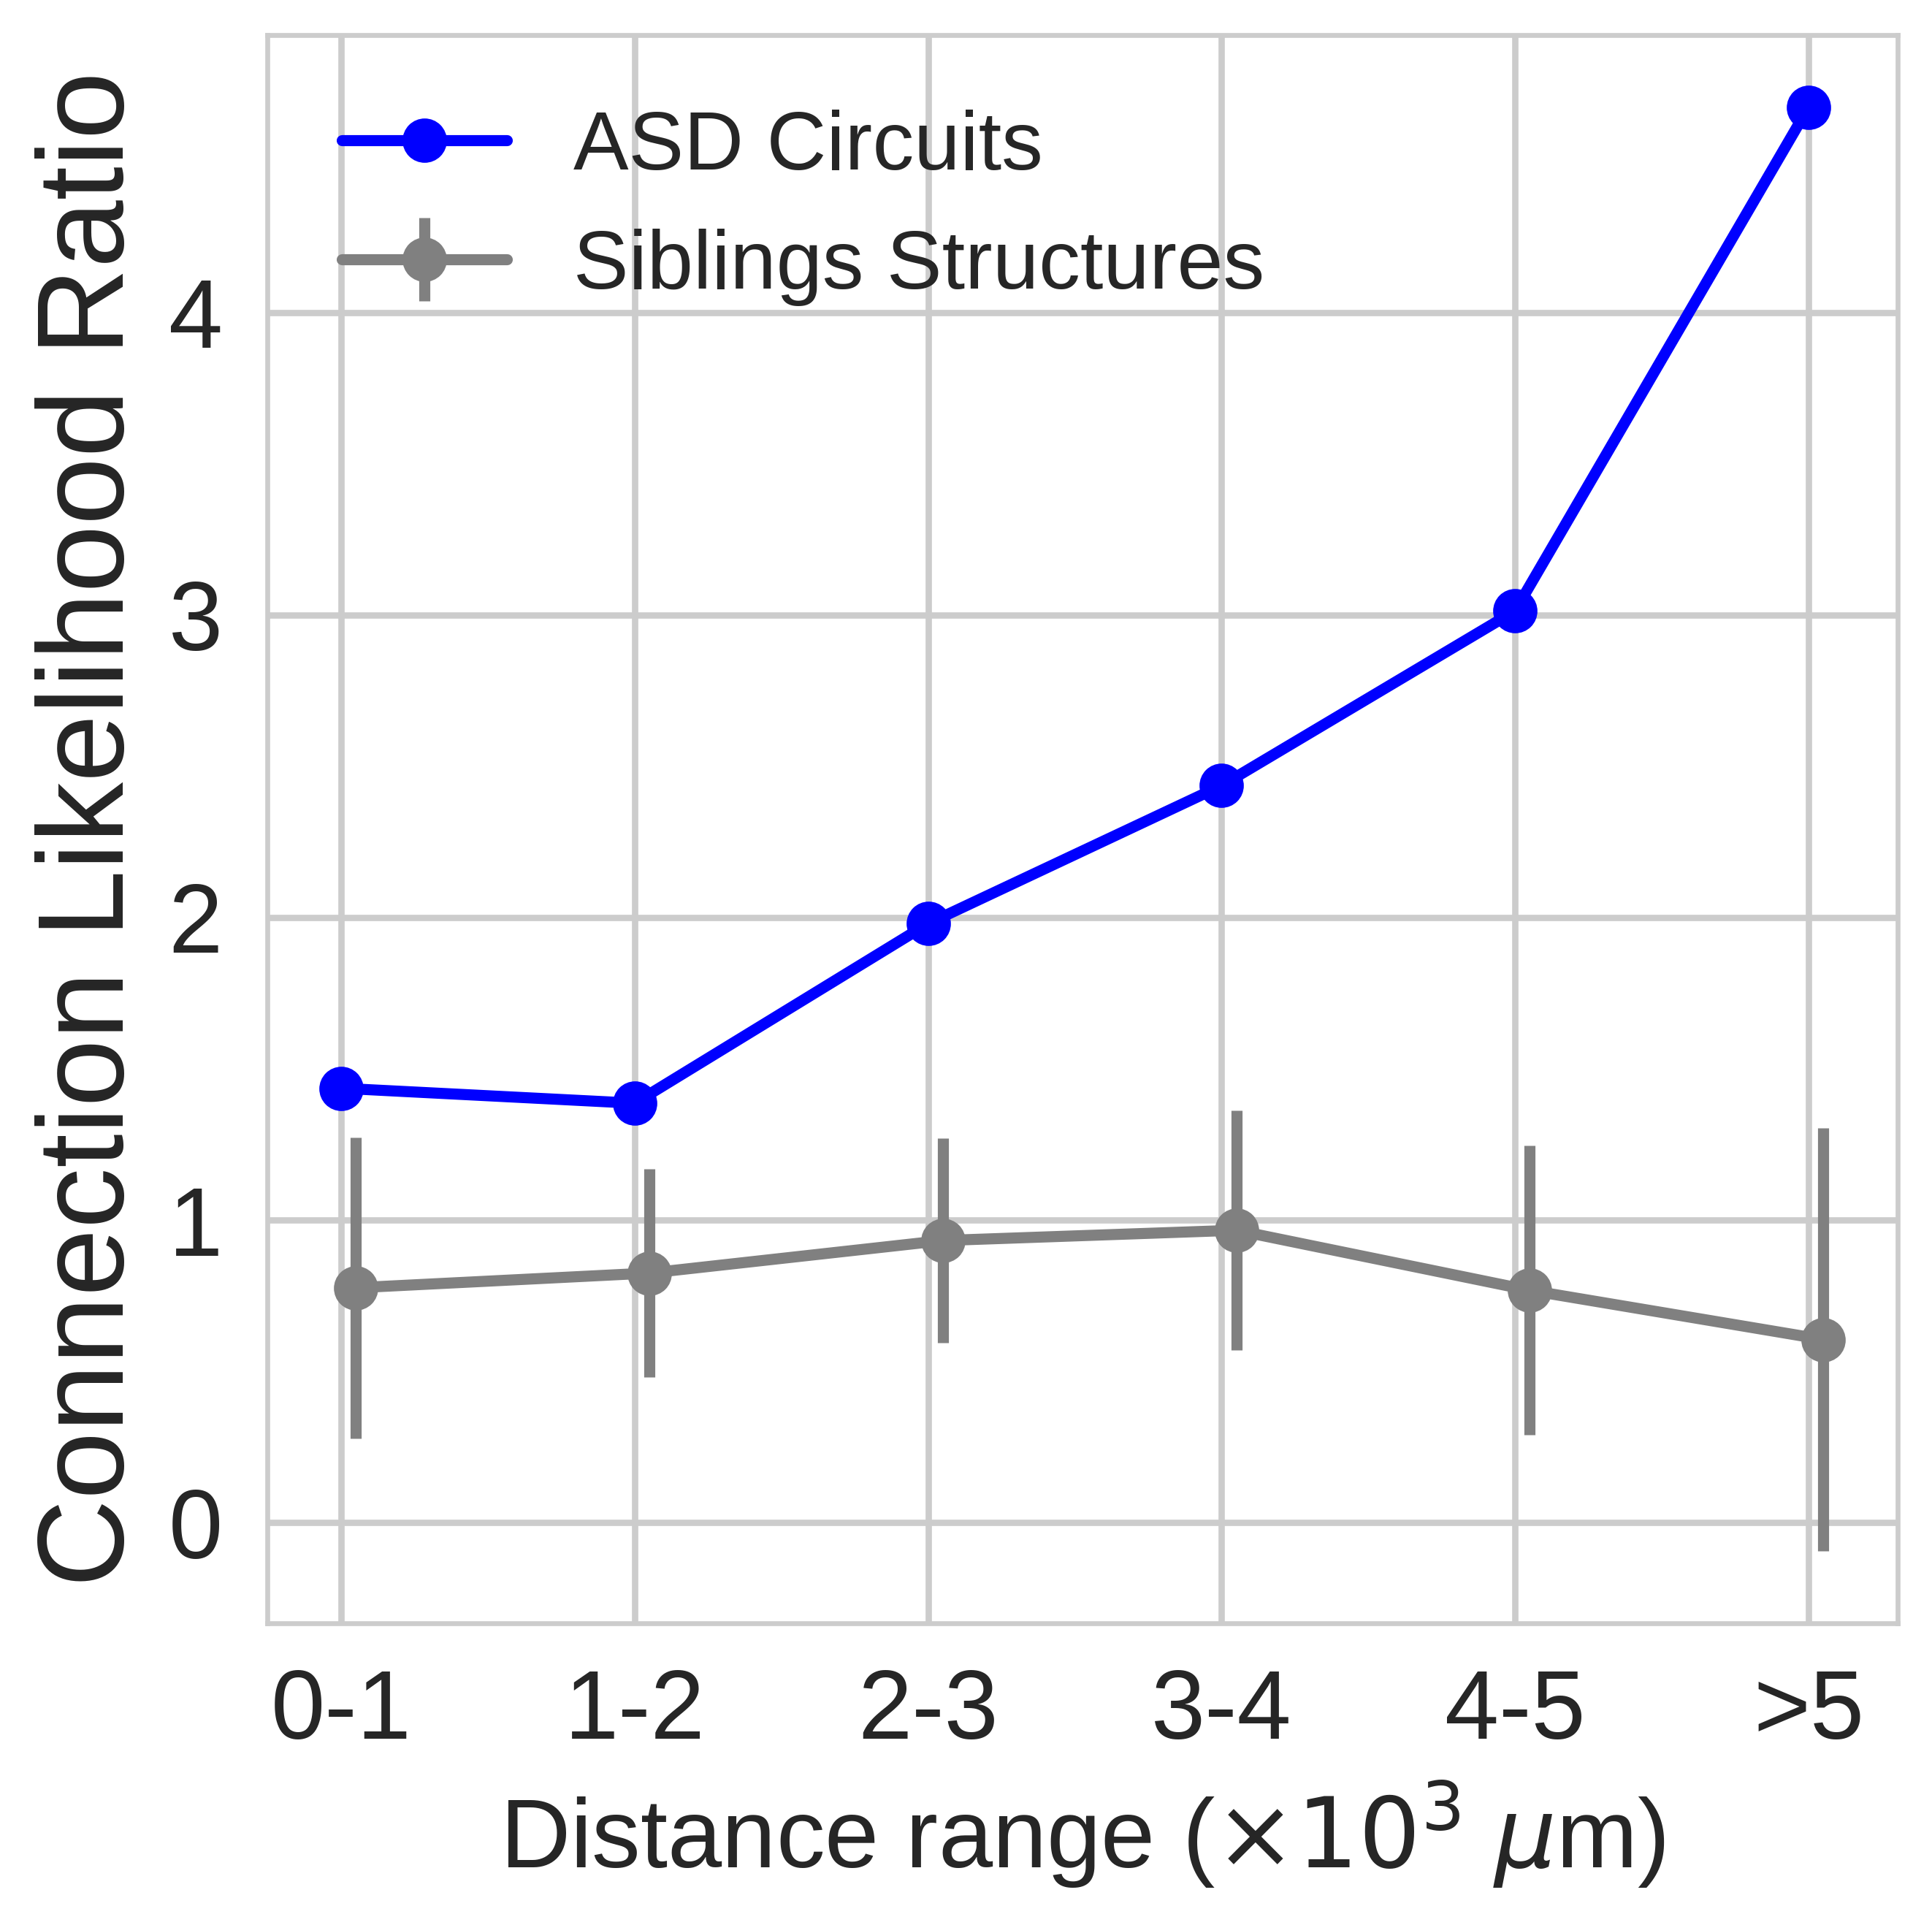

In [48]:
fig, ax = plt.subplots(dpi=480, figsize=(6,6))
norm = N_Connections_total/N_Pairs_total
ax.plot(np.arange(6), ASD_Connections/ASD_Pairs / norm , marker="o" , color="blue", label="ASD Circuits")
#ax.plot(np.arange(6) + 0.05, SIB_Connections/SIB_Pairs / norm, marker="o", color="orange", label="Sibling Circuits")
ax.errorbar(np.arange(6) + 0.05, 
                 subsib_conns_mean/subsib_pairs_mean / norm, 
                 yerr= np.nanstd(subsib_connections/subsib_Pairs/norm, axis=0),
                 marker="o", color="grey", label="Siblings Structures")

ax.grid(True)
ax.legend(loc="upper left", fontsize=17)
ax.set_ylabel("Connection Likelihood Ratio", fontsize=25)
ax.set_xlabel(r"Distance range ($\times 10^3$ $\mu$m)", fontsize=20)
ax.set_xticklabels(["", "0-1", "1-2", "2-3", "3-4", "4-5", r">5"], fontsize=20)
ax.tick_params(axis='y', labelsize=20)
#plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%s x1000'))
#plt.tight_layout()
plt.show()

In [44]:
ASD_Connections/ASD_Pairs / norm

array([1.43528475, 1.38580647, 1.97977178, 2.43613803, 3.01379415,
       4.67905159])

In [45]:
(subsib_conns_mean/subsib_pairs_mean / norm)

array([0.77573262, 0.82428504, 0.93190654, 0.96590182, 0.76725539,
       0.6046868 ])

/tmp/ipykernel_49260/4187973020.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["", "0-1", "1-2", "2-3", "3-4", "4-5", r">5"], fontsize=20)


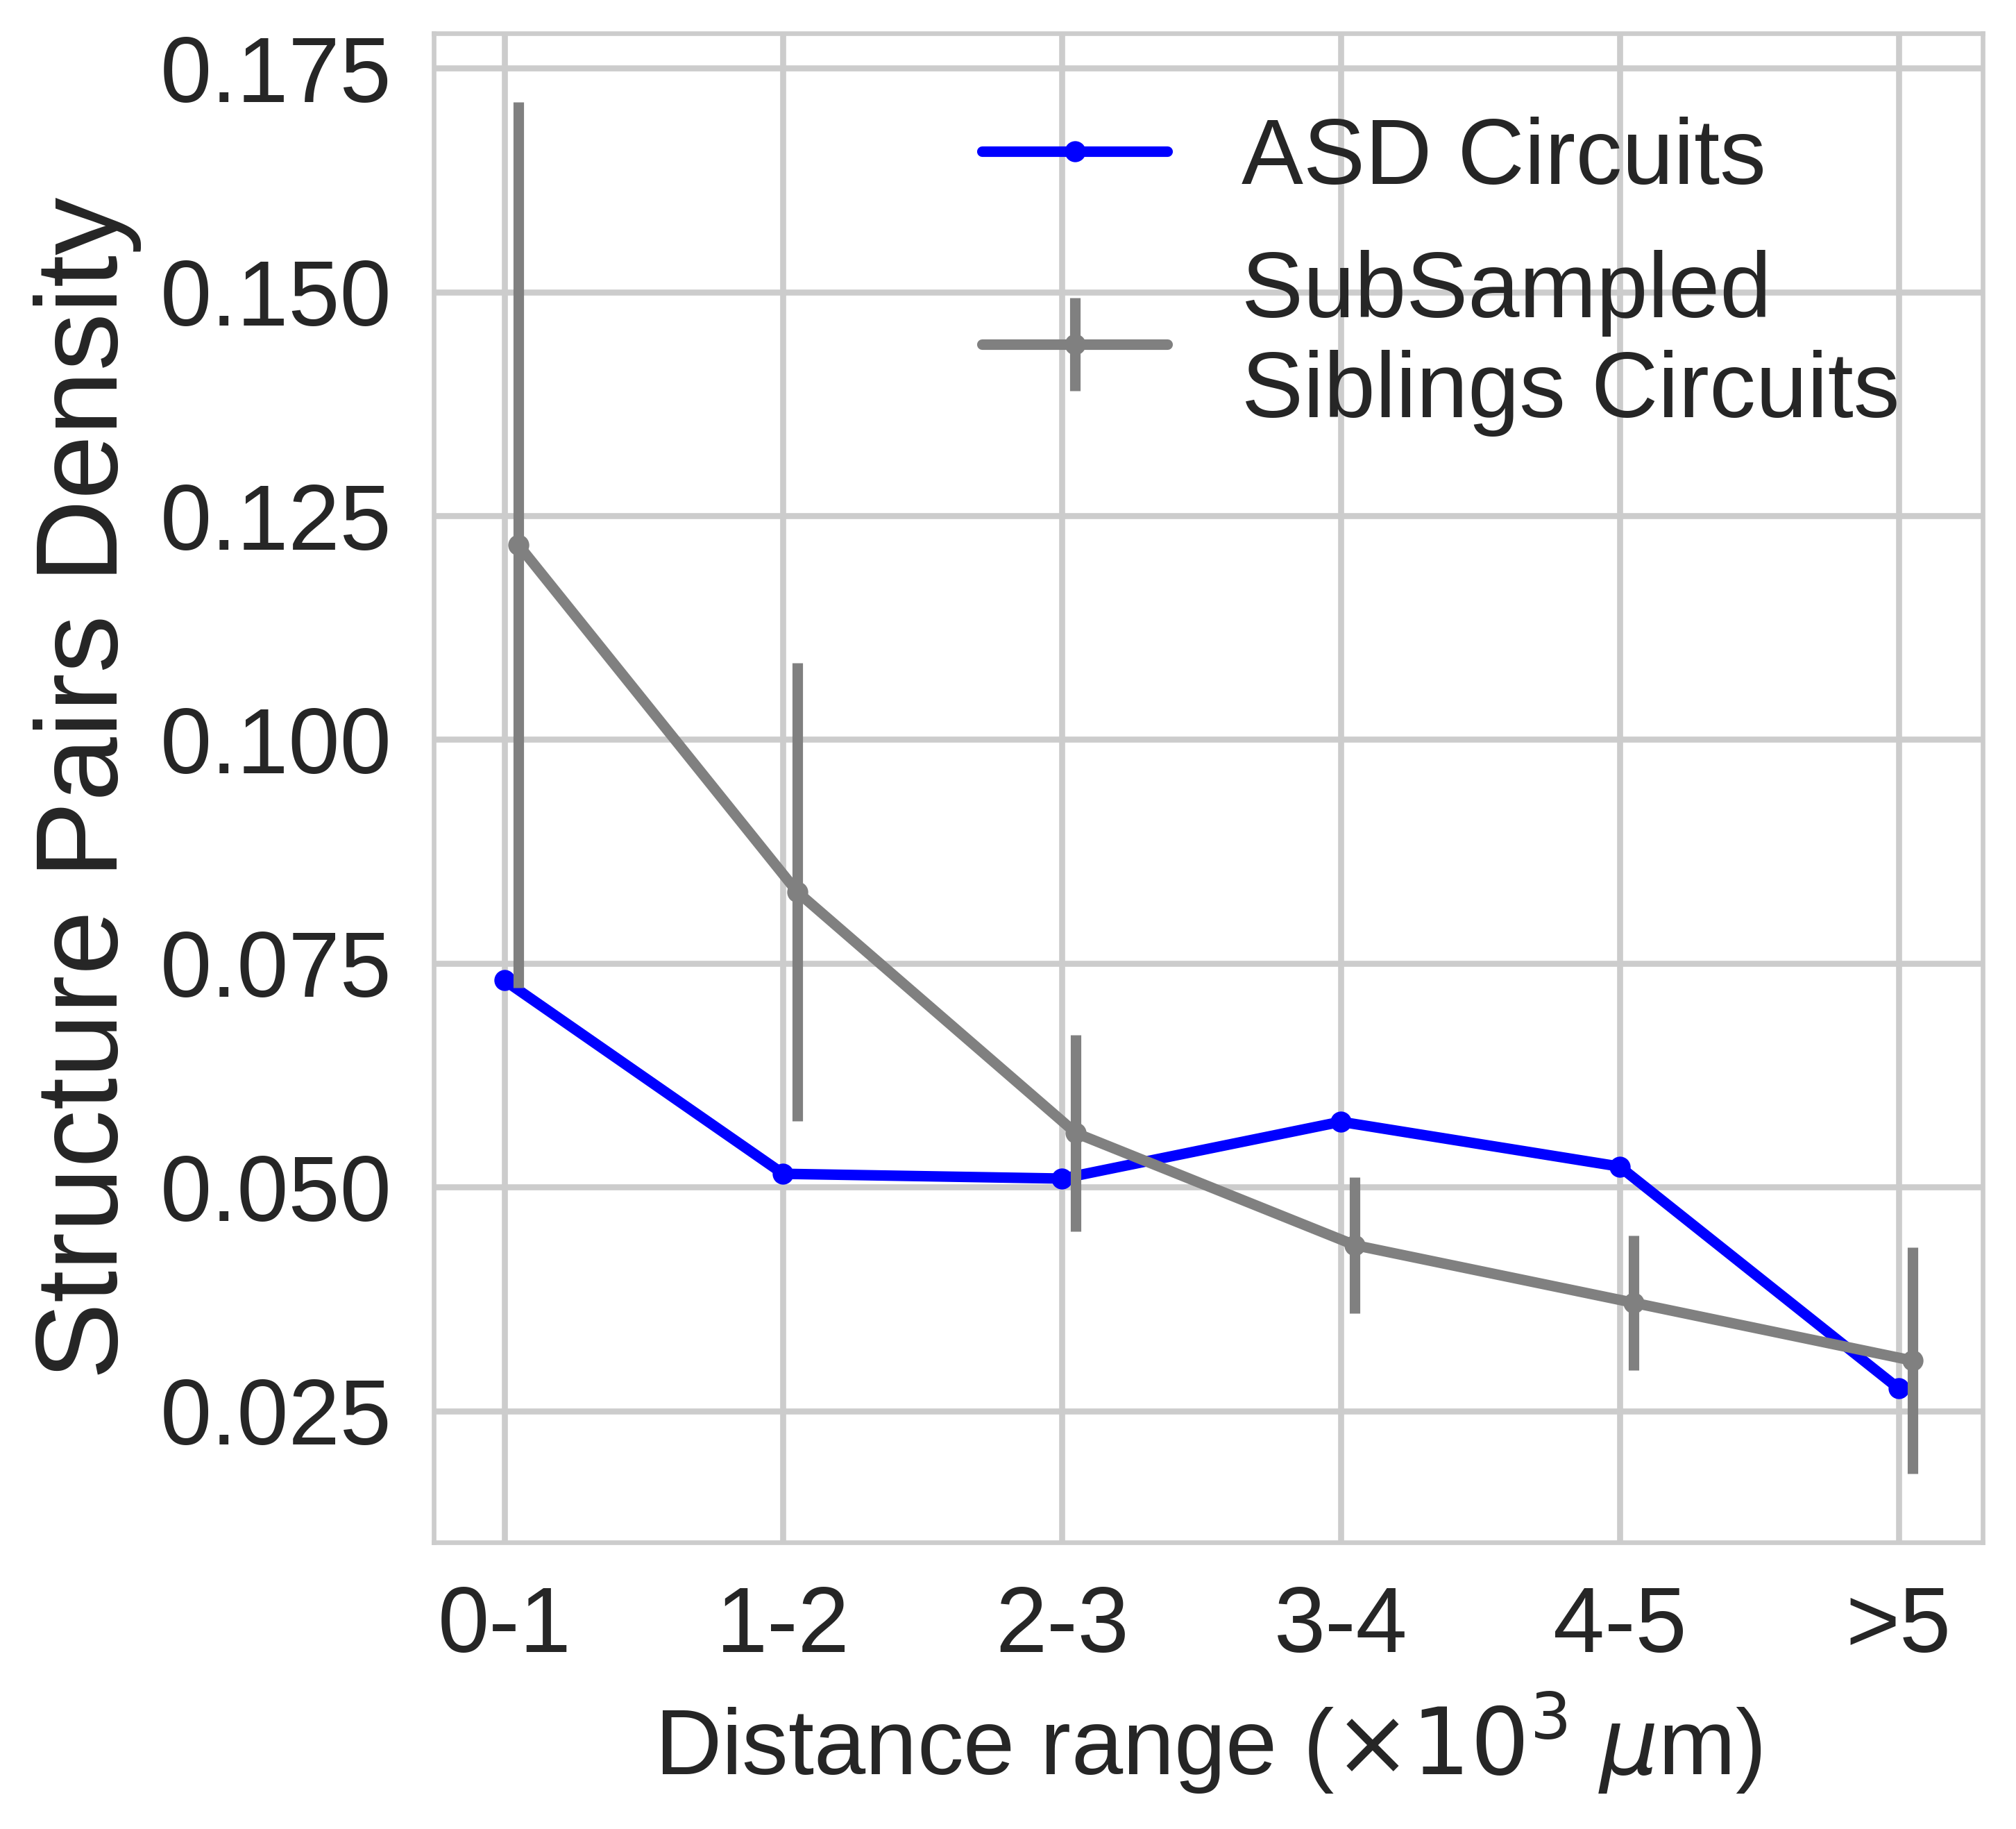

In [46]:
fig, ax = plt.subplots(dpi=480, figsize=(6,6))
ax.plot(np.arange(6), ASD_Pairs/N_Pairs_total, marker="." , color="blue", label="ASD Circuits")
#ax.plot(np.arange(6) + 0.05, SIB_Pairs/N_Pairs_total, marker=".", color="orange", label="Sibling Circuits")
ax.errorbar(np.arange(6) + 0.05, 
                 subsib_pairs_mean/N_Pairs_total, 
                 yerr= np.nanstd(subsib_Pairs/N_Pairs_total, axis=0),#subsib_pairs_std/N_Pairs_total,
                 marker=".", color="grey", label="SubSampled \nSiblings Circuits")

ax.grid(True)
ax.legend(loc="upper right", fontsize=20)
ax.set_ylabel("Structure Pairs Density", fontsize=25)
ax.set_xlabel(r"Distance range ($\times 10^3$ $\mu$m)", fontsize=20)
ax.set_xticklabels(["", "0-1", "1-2", "2-3", "3-4", "4-5", r">5"], fontsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.legend(fontsize=20)



# Doing with Sibling "circuits"

In [14]:
def normtoUnit(x, xmin, xmax):
    return (x-xmin)/(xmax-xmin)

def searchFil(text, DIR):
    RES = []
    for file in os.listdir(DIR):
        if text in file:
            RES.append(file)
    return RES

def LoadSA3(fname, DIR, InfoMat, topL=100):
    fin = open(DIR+fname, 'rt')
    max_score, max_bias, max_STRs = 0, 0, []
    for i, l in enumerate(fin):
        if i > topL:
            break
        l = l.strip().split()
        bias = float(l[1])
        STRs = l[2].split(",")
        score = ScoreCircuit_SI_Joint(STRs, InfoMat)
        if score > max_score:
            max_score = score
            max_bias = bias
            max_STRs = STRs
    return max_score, max_bias, max_STRs

def GetData2(params, size, DIR, InfoMat):
    SCORES, CutBias, RealBias, STRS = [],[],[],[]
    for i, row in params.iterrows():
        fil = searchFil("keepN_{}-minbias_{}.txt".format(size, row["bias"]), DIR)[0]
        score, real_minbias, STRs = LoadSA3(fil, DIR, InfoMat)
        score = ScoreCircuit_SI_Joint(STRs, InfoMat)
        if score == 0:
            continue
        SCORES.append(score)
        CutBias.append(row["bias"])
        RealBias.append(real_minbias)
        STRS.append(STRs)
    return SCORES, CutBias, RealBias, STRS

def ExtractSibSTR(bias_cut, DIR, InfoMat):
    fil = searchFil("topN_121-keepN_46-minbias_{}.txt".format(bias_cut), DIR)[0]
    score, real_minbias, STRs = LoadSA3(fil, DIR, InfoMat) 
    return STRs

In [15]:
biaslim_df = pd.read_csv(
    "../dat/Circuits/SA/biaslims2/biaslim.size.46.top17.txt", names=["size", "bias"])
InfoMat = pd.read_csv("../dat/allen-mouse-conn/ScoreingMat_jw_v3/InfoMat.Ipsi.csv", index_col=0)
adj_mat = pd.read_csv("../dat/allen-mouse-conn/ScoreingMat_jw_v3/WeightMat.Ipsi.csv", index_col=0)

InfoMat_short = pd.read_csv("../dat/allen-mouse-conn/ScoreingMat_jw_v3/InfoMat.Ipsi.short.csv", index_col=0)

InfoMat_long = pd.read_csv("../dat/allen-mouse-conn/ScoreingMat_jw_v3/InfoMat.Ipsi.long.csv", index_col=0)

In [16]:
biaslim_df.tail(5)

,size,bias
12,46,0.360
13,46,0.365
14,46,0.370
15,46,0.375
16,46,0.380


In [17]:
ASD_STR_Bias = pd.read_csv("../../ASD_Circuits/dat/Unionize_bias/Spark_Meta_EWS.Z2.bias.csv", 
                           index_col="STR")
ASD_Circuits = ASD_CircuitsSet.loc[3, "STRs"].split(";")
ASD_Connections = []
ASD_Pairs = []
for i,v in enumerate(Distance_Cuts[:-1]):
    adj_mat_ = Cutted_AdjMat[i]
    dist_mat_ = Cutted_DistMat[i]
    adj_mat_asd = adj_mat_.loc[ASD_Circuits,ASD_Circuits]
    dist_mat_asd = dist_mat_.loc[ASD_Circuits,ASD_Circuits]
    Nconn = np.count_nonzero(adj_mat_asd)
    Npair = np.count_nonzero(dist_mat_asd)
    ASD_Connections.append(Nconn)
    ASD_Pairs.append(Npair)
ASD_Connections = np.array(ASD_Connections)
ASD_Pairs = np.array(ASD_Pairs)
print(ASD_STR_Bias.loc[ASD_Circuits, "EFFECT"].mean())

0.37007512029116524


In [20]:
# Get sibling circuits structures

SIB_SA_DIR = "/home/jw3514/Work/ASD_Circuits/dat/Circuits/SA/SubSib_ScoreInfo_Dec21/"
#SIB_SA_DIR = "/home/jw3514/Work/ASD_Circuits/dat/Circuits/SA/SubSib_Score_SI_Nov27_2023//"
#SIB_SA_DIR = "/home/jw3514/Work/ASD_Circuits/dat/Circuits/SA/SubSib_ScoreInfo_Sept_2023//"
bias_cut = 0.37
Sib_Cir_STRs = []
for i, file in enumerate(os.listdir(SIB_SA_DIR)):
    d = os.path.join(SIB_SA_DIR, file)
    if os.path.isdir(d):
        try:
            ASD_cont_Dir = SIB_SA_DIR + file + "/"
            Sib_CirSTR = ExtractSibSTR(bias_cut, ASD_cont_Dir, InfoMat)
            Sib_Cir_STRs.append(Sib_CirSTR)
        except:
            continue
    #if i > 10:
    #    break

In [21]:
len(Sib_Cir_STRs)

5394

In [14]:
subsib_connections = []
subsib_Pairs = []
Sim_dir = "../dat/Unionize_bias/SubSampleSib//"
for i, _SibSTRs in enumerate(Sib_Cir_STRs):
    _SIB_Connections = []
    _SIB_Pairs = []
    for i,v in enumerate(Distance_Cuts[:-1]):
        adj_mat_ = Cutted_AdjMat[i]
        dist_mat_ = Cutted_DistMat[i]
        adj_mat_sib = adj_mat_.loc[_SibSTRs,_SibSTRs]
        dist_mat_sib = dist_mat_.loc[_SibSTRs,_SibSTRs]
        Nconn = np.count_nonzero(adj_mat_sib)
        Npair = np.count_nonzero(dist_mat_sib)
        _SIB_Connections.append(Nconn)
        _SIB_Pairs.append(Npair)
    subsib_connections.append(_SIB_Connections)
    subsib_Pairs.append(_SIB_Pairs)
subsib_connections = np.array(subsib_connections)
subsib_Pairs = np.array(subsib_Pairs)

In [15]:
subsib_connections.shape

(5394, 5)

In [16]:
subsib_conns_mean =  np.mean(subsib_connections, axis=0)
subsib_conns_std =  np.std(subsib_connections, axis=0)
subsib_pairs_mean =  np.mean(subsib_Pairs, axis=0)
subsib_pairs_std =  np.std(subsib_Pairs, axis=0)

In [17]:
subsib_conns_mean

array([19.06433074, 82.01557286, 71.11197627, 46.85984427, 33.17612162])

In [18]:
subsib_pairs_mean

array([104.88728217, 398.33073786, 492.05413422, 439.92102336,
       633.27178346])

In [19]:
subsib_pairs_std

array([ 39.44422351, 120.1385447 ,  97.07894661,  72.22550783,
       219.4015065 ])

In [20]:
ASD_Connections/N_Connections_total

array([0.10493827, 0.0713422 , 0.10086101, 0.13957307, 0.14417178])

In [21]:
SIB_Connections/N_Connections_total

NameError: name 'SIB_Connections' is not defined

In [22]:
N_Connections_total

array([162, 827, 813, 609, 652])

In [23]:
ASD_Connections/subsib_conns_mean

array([0.89171764, 0.71937558, 1.15311097, 1.81391981, 2.83336314])

In [24]:
# significance of connection enrichment:
for asd, sibs in zip(ASD_Connections, subsib_connections.T):
    #print(asd, len(sibs))
    z,p = GetPermutationP(sibs, asd)
    print(p)

0.5849860982391103
0.7816496756255793
0.28637627432808155
0.037998146431881374
0.008155699721964838


In [25]:
# significance of connection enrichment:
for asd, sibs in zip(ASD_Connections, subsib_connections.T):
    #print(asd, len(sibs))
    #z,p = GetPermutationP(sibs, asd)
    #print(p)
    print(np.mean(sibs))

19.064330737856878
82.01557285873193
71.11197626992956
46.85984427141268
33.17612161661105


In [26]:
ASD_Connections

array([17, 59, 82, 85, 94])

In [27]:
ASD_Pairs

array([ 62, 226, 404, 546, 832])

In [28]:
ASD_Pairs/subsib_pairs_mean

array([0.59111075, 0.56736771, 0.82104787, 1.24113186, 1.31381189])

In [29]:
# significance of connection pairs:
for asd, sibs in zip(ASD_Pairs, subsib_Pairs.T):
    #print(asd, len(sibs))
    z,p = GetPermutationP(sibs, asd)
    print(p)

0.8784059314179796
0.9506950880444857
0.8116774791473587
0.06506024096385543
0.196663577386469


In [30]:
(ASD_Connections/ASD_Pairs) / (subsib_conns_mean/subsib_pairs_mean)

array([1.5085458 , 1.26791772, 1.40443817, 1.46150451, 2.15659727])

In [31]:
#norm = N_Connections_total/N_Pairs_total

In [32]:
# significance of fc:
norm = N_Connections_total/N_Pairs_total
for asd, sibs in zip(ASD_Connections/ASD_Pairs / norm, (subsib_connections/subsib_Pairs / norm).T):
    #print(asd, len(sibs))
    z,p = GetPermutationP(sibs, asd)
    print(p)

0.2609905397885365
0.26803932480059356
0.0949731033203487
0.08606937488406607
0.03951029493600444


/tmp/ipykernel_2186557/462637420.py:3: RuntimeWarning: invalid value encountered in true_divide
  for asd, sibs in zip(ASD_Connections/ASD_Pairs / norm, (subsib_connections/subsib_Pairs / norm).T):


In [33]:
split_idx = 3
CaseGroup1 = np.sum(ASD_Connections[:split_idx])/np.sum(N_Connections_total[:split_idx])
CaseGroup2 = np.sum(ASD_Connections[split_idx:])/np.sum(N_Connections_total[split_idx:])
CtrlGroup1 = np.sum(subsib_connections[:, :split_idx], axis=1)/np.sum(N_Connections_total[:split_idx])
CtrlGroup2 = np.sum(subsib_connections[:, split_idx:], axis=1)/np.sum(N_Connections_total[split_idx:])

# significance of fc:
z,p = GetPermutationP(CtrlGroup1, CaseGroup1)
print(p)

z,p = GetPermutationP(CtrlGroup2, CaseGroup2)
print(p)

0.5753475440222429
0.00908248378127896


In [34]:
CaseGroup1,CaseGroup2

(0.0876803551609323, 0.14195083267248215)

In [35]:
norm

array([0.19103774, 0.18838269, 0.10252207, 0.06390346, 0.02903197])

In [36]:
split_idx = 3
CaseGroup1 = np.sum(ASD_Connections[:split_idx])/np.sum(ASD_Pairs[:split_idx])/np.sum(N_Connections_total[:split_idx]/N_Pairs_total[:split_idx])
CaseGroup2 = np.sum(ASD_Connections[split_idx:])/np.sum(ASD_Pairs[split_idx:])/np.sum(N_Connections_total[split_idx:]/N_Pairs_total[split_idx:])
CtrlGroup1 = np.sum(subsib_connections[:, :split_idx], axis=1)/np.sum(subsib_Pairs[:, :split_idx], axis=1)/np.sum(N_Connections_total[:split_idx]/N_Pairs_total[:split_idx])
CtrlGroup2 = np.sum(subsib_connections[:, split_idx:], axis=1)/np.sum(subsib_Pairs[:, split_idx:], axis=1)/np.sum(N_Connections_total[split_idx:]/N_Pairs_total[split_idx:])

# significance of fc:
z,p = GetPermutationP(CtrlGroup1, CaseGroup1)
print(p)

z,p = GetPermutationP(CtrlGroup2, CaseGroup2)
print(p)

0.16583194212576513
0.046744574290484175


/tmp/ipykernel_2186557/3310497800.py:4: RuntimeWarning: invalid value encountered in true_divide
  CtrlGroup1 = np.sum(subsib_connections[:, :split_idx], axis=1)/np.sum(subsib_Pairs[:, :split_idx], axis=1)/np.sum(N_Connections_total[:split_idx]/N_Pairs_total[:split_idx])
/tmp/ipykernel_2186557/3310497800.py:5: RuntimeWarning: invalid value encountered in true_divide
  CtrlGroup2 = np.sum(subsib_connections[:, split_idx:], axis=1)/np.sum(subsib_Pairs[:, split_idx:], axis=1)/np.sum(N_Connections_total[split_idx:]/N_Pairs_total[split_idx:])


/tmp/ipykernel_2186557/2925915916.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')
/tmp/ipykernel_2186557/2925915916.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["", "0-1", "1-2", "2-3", "3-4", r">4"], fontsize=20)


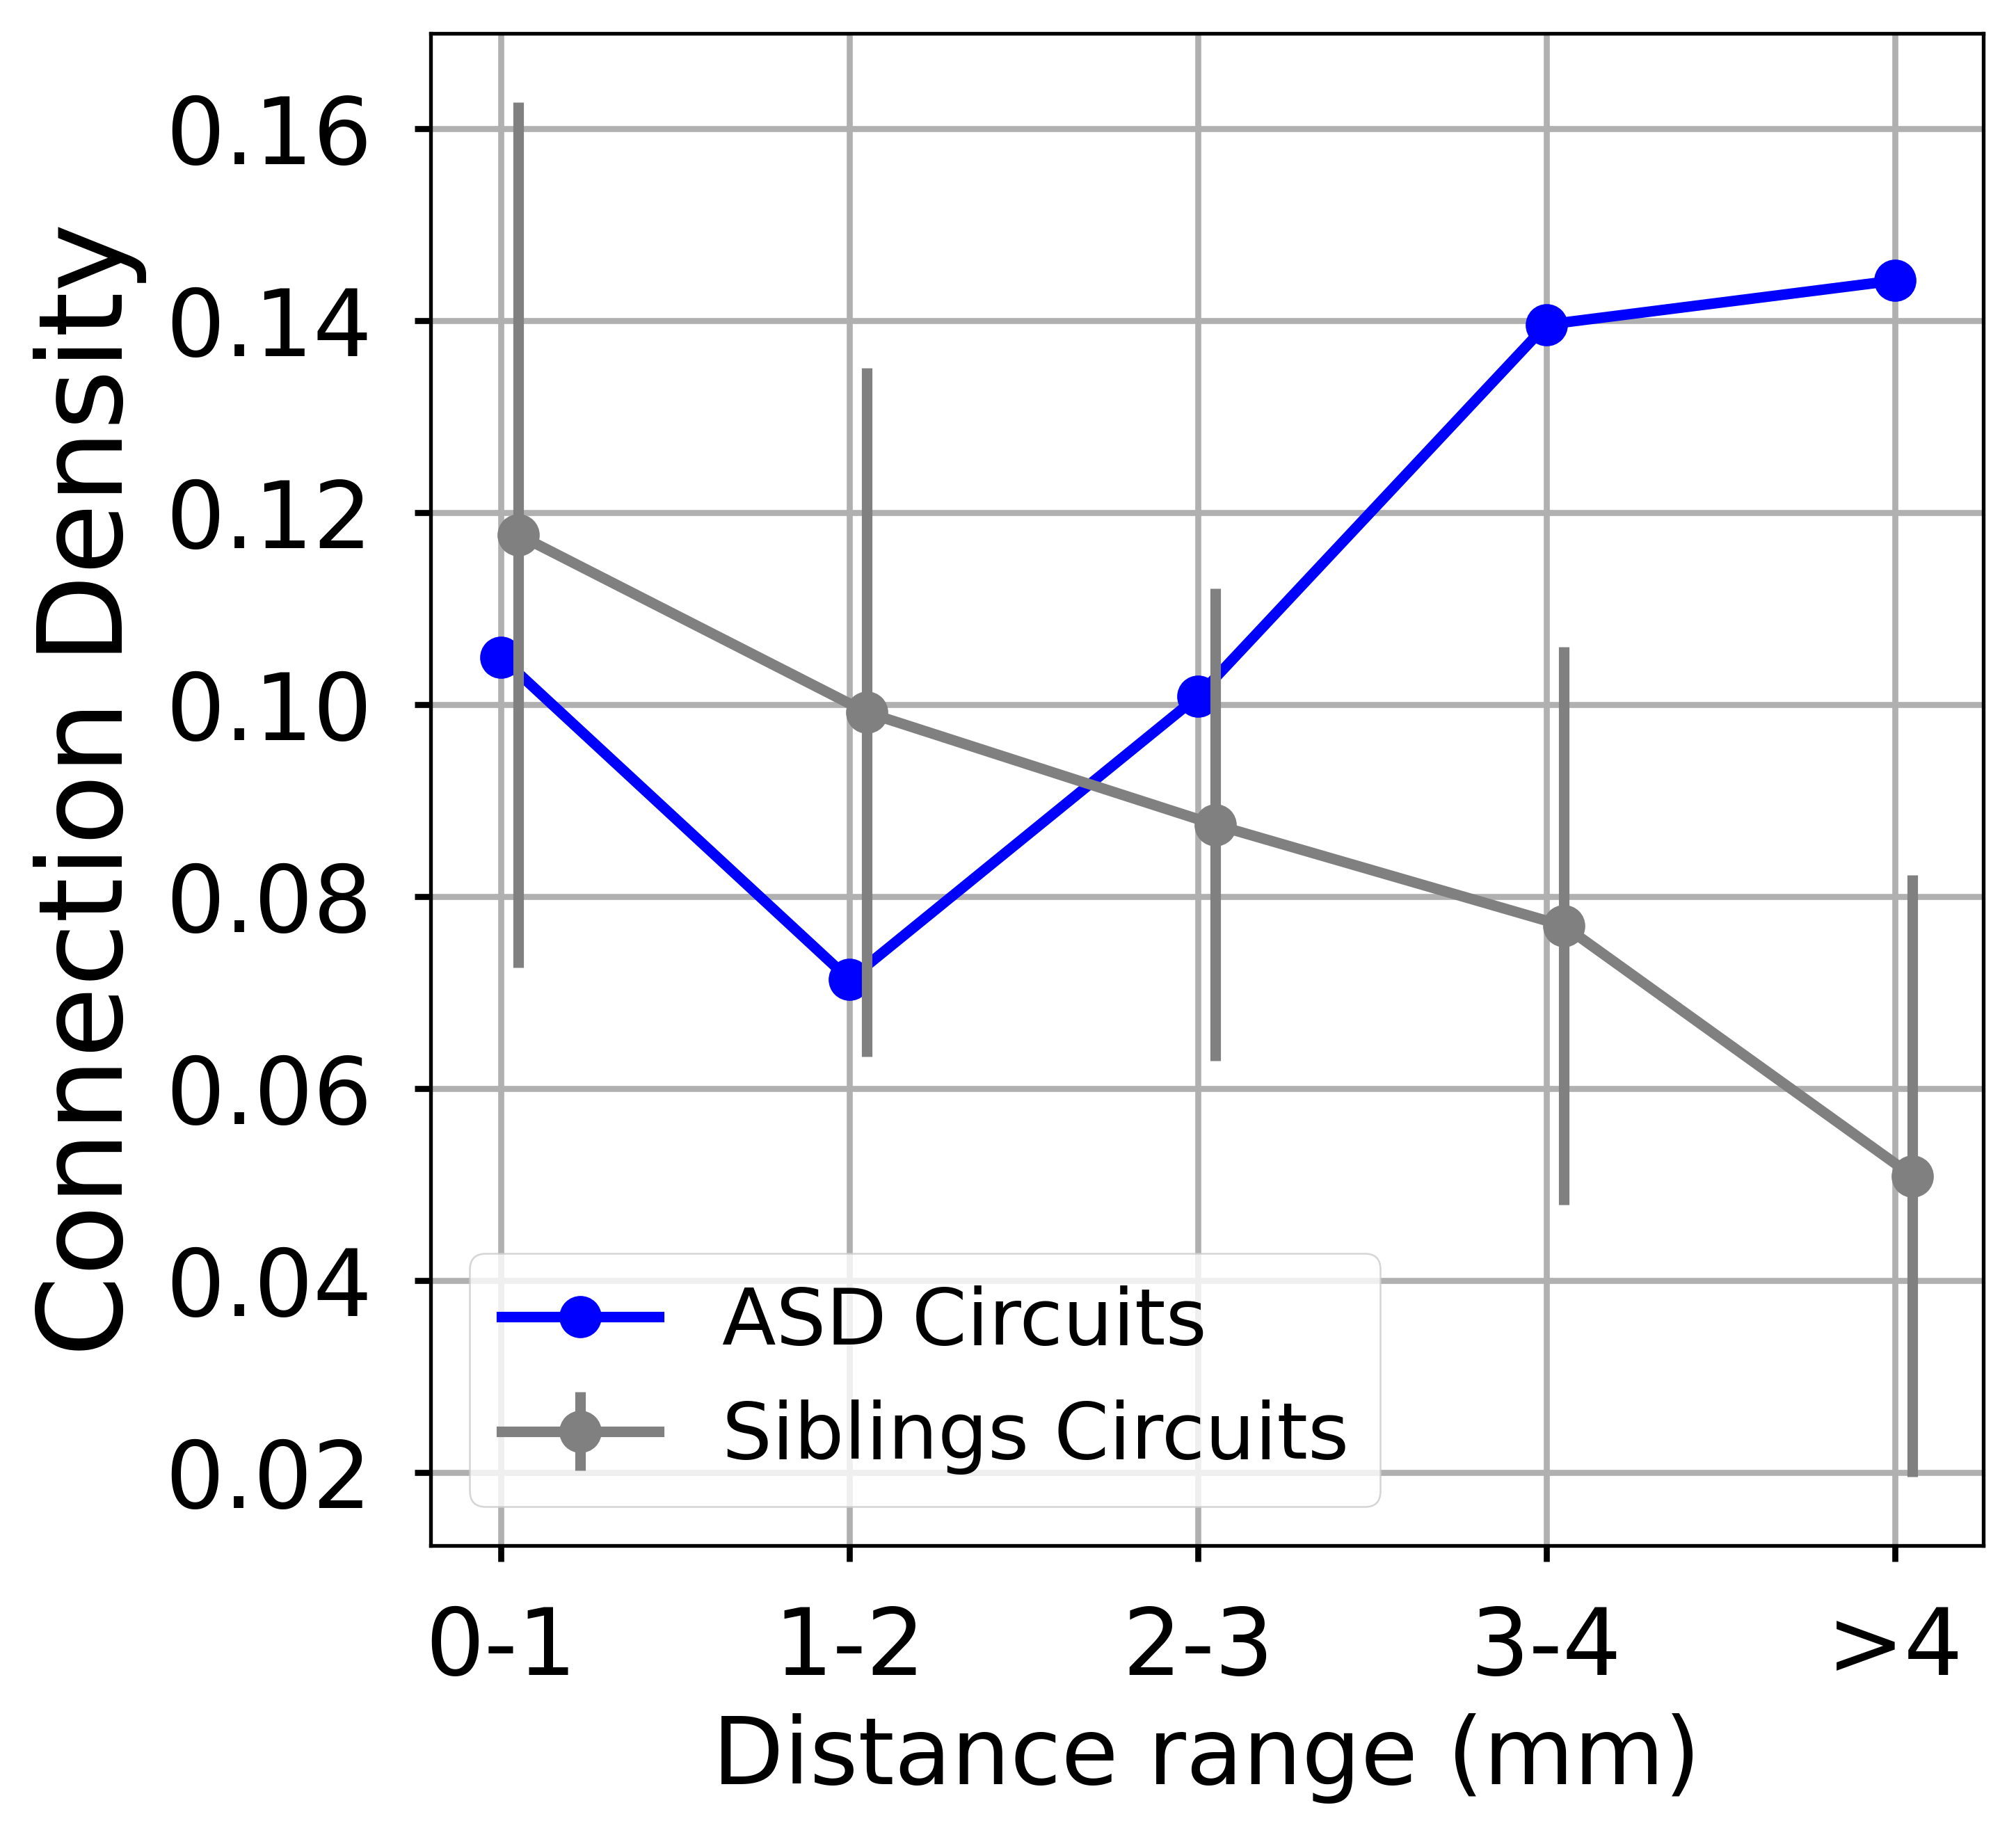

In [44]:
%matplotlib inline
import matplotlib.ticker as mticker  
plt.style.use('seaborn-talk')
matplotlib.rcParams.update({'font.size': 25})
fig, ax = plt.subplots(dpi=480, figsize=(6,6))

ax.plot(np.arange(5), ASD_Connections/N_Connections_total, marker="o" , color="blue", label="ASD Circuits")
#ax.plot(np.arange(6) + 0.05, SIB_Connections/N_Connections_total, marker="o", color="orange", label="Sibling Circuits")
ax.errorbar(np.arange(5) + 0.05, 
                 subsib_conns_mean/N_Connections_total, 
                 yerr= np.nanstd(subsib_connections/N_Connections_total, axis=0), #subsib_conns_std/N_Connections_total,
                 marker="o", color="grey", label="Siblings Circuits",)

ax.grid(True)
ax.legend(loc="lower left", fontsize=17)
ax.set_ylabel("Connection Density", fontsize=25)
ax.set_xlabel(r"Distance range (mm)", fontsize=20)
#ax.set_xticklabels(["", "0-1", "1-2", "2-3", "3-4", "4-5", r">5"], fontsize=20)
ax.set_xticklabels(["", "0-1", "1-2", "2-3", "3-4", r">4"], fontsize=20)
ax.tick_params(axis='y', labelsize=20)
#ax.set_ylim(0, 0.17)
plt.show()

/tmp/ipykernel_2186557/1741187616.py:7: RuntimeWarning: invalid value encountered in true_divide
  yerr= np.nanstd(subsib_connections/subsib_Pairs/norm, axis=0),
/tmp/ipykernel_2186557/1741187616.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["", "0-1", "1-2", "2-3", "3-4", r">4"], fontsize=20)


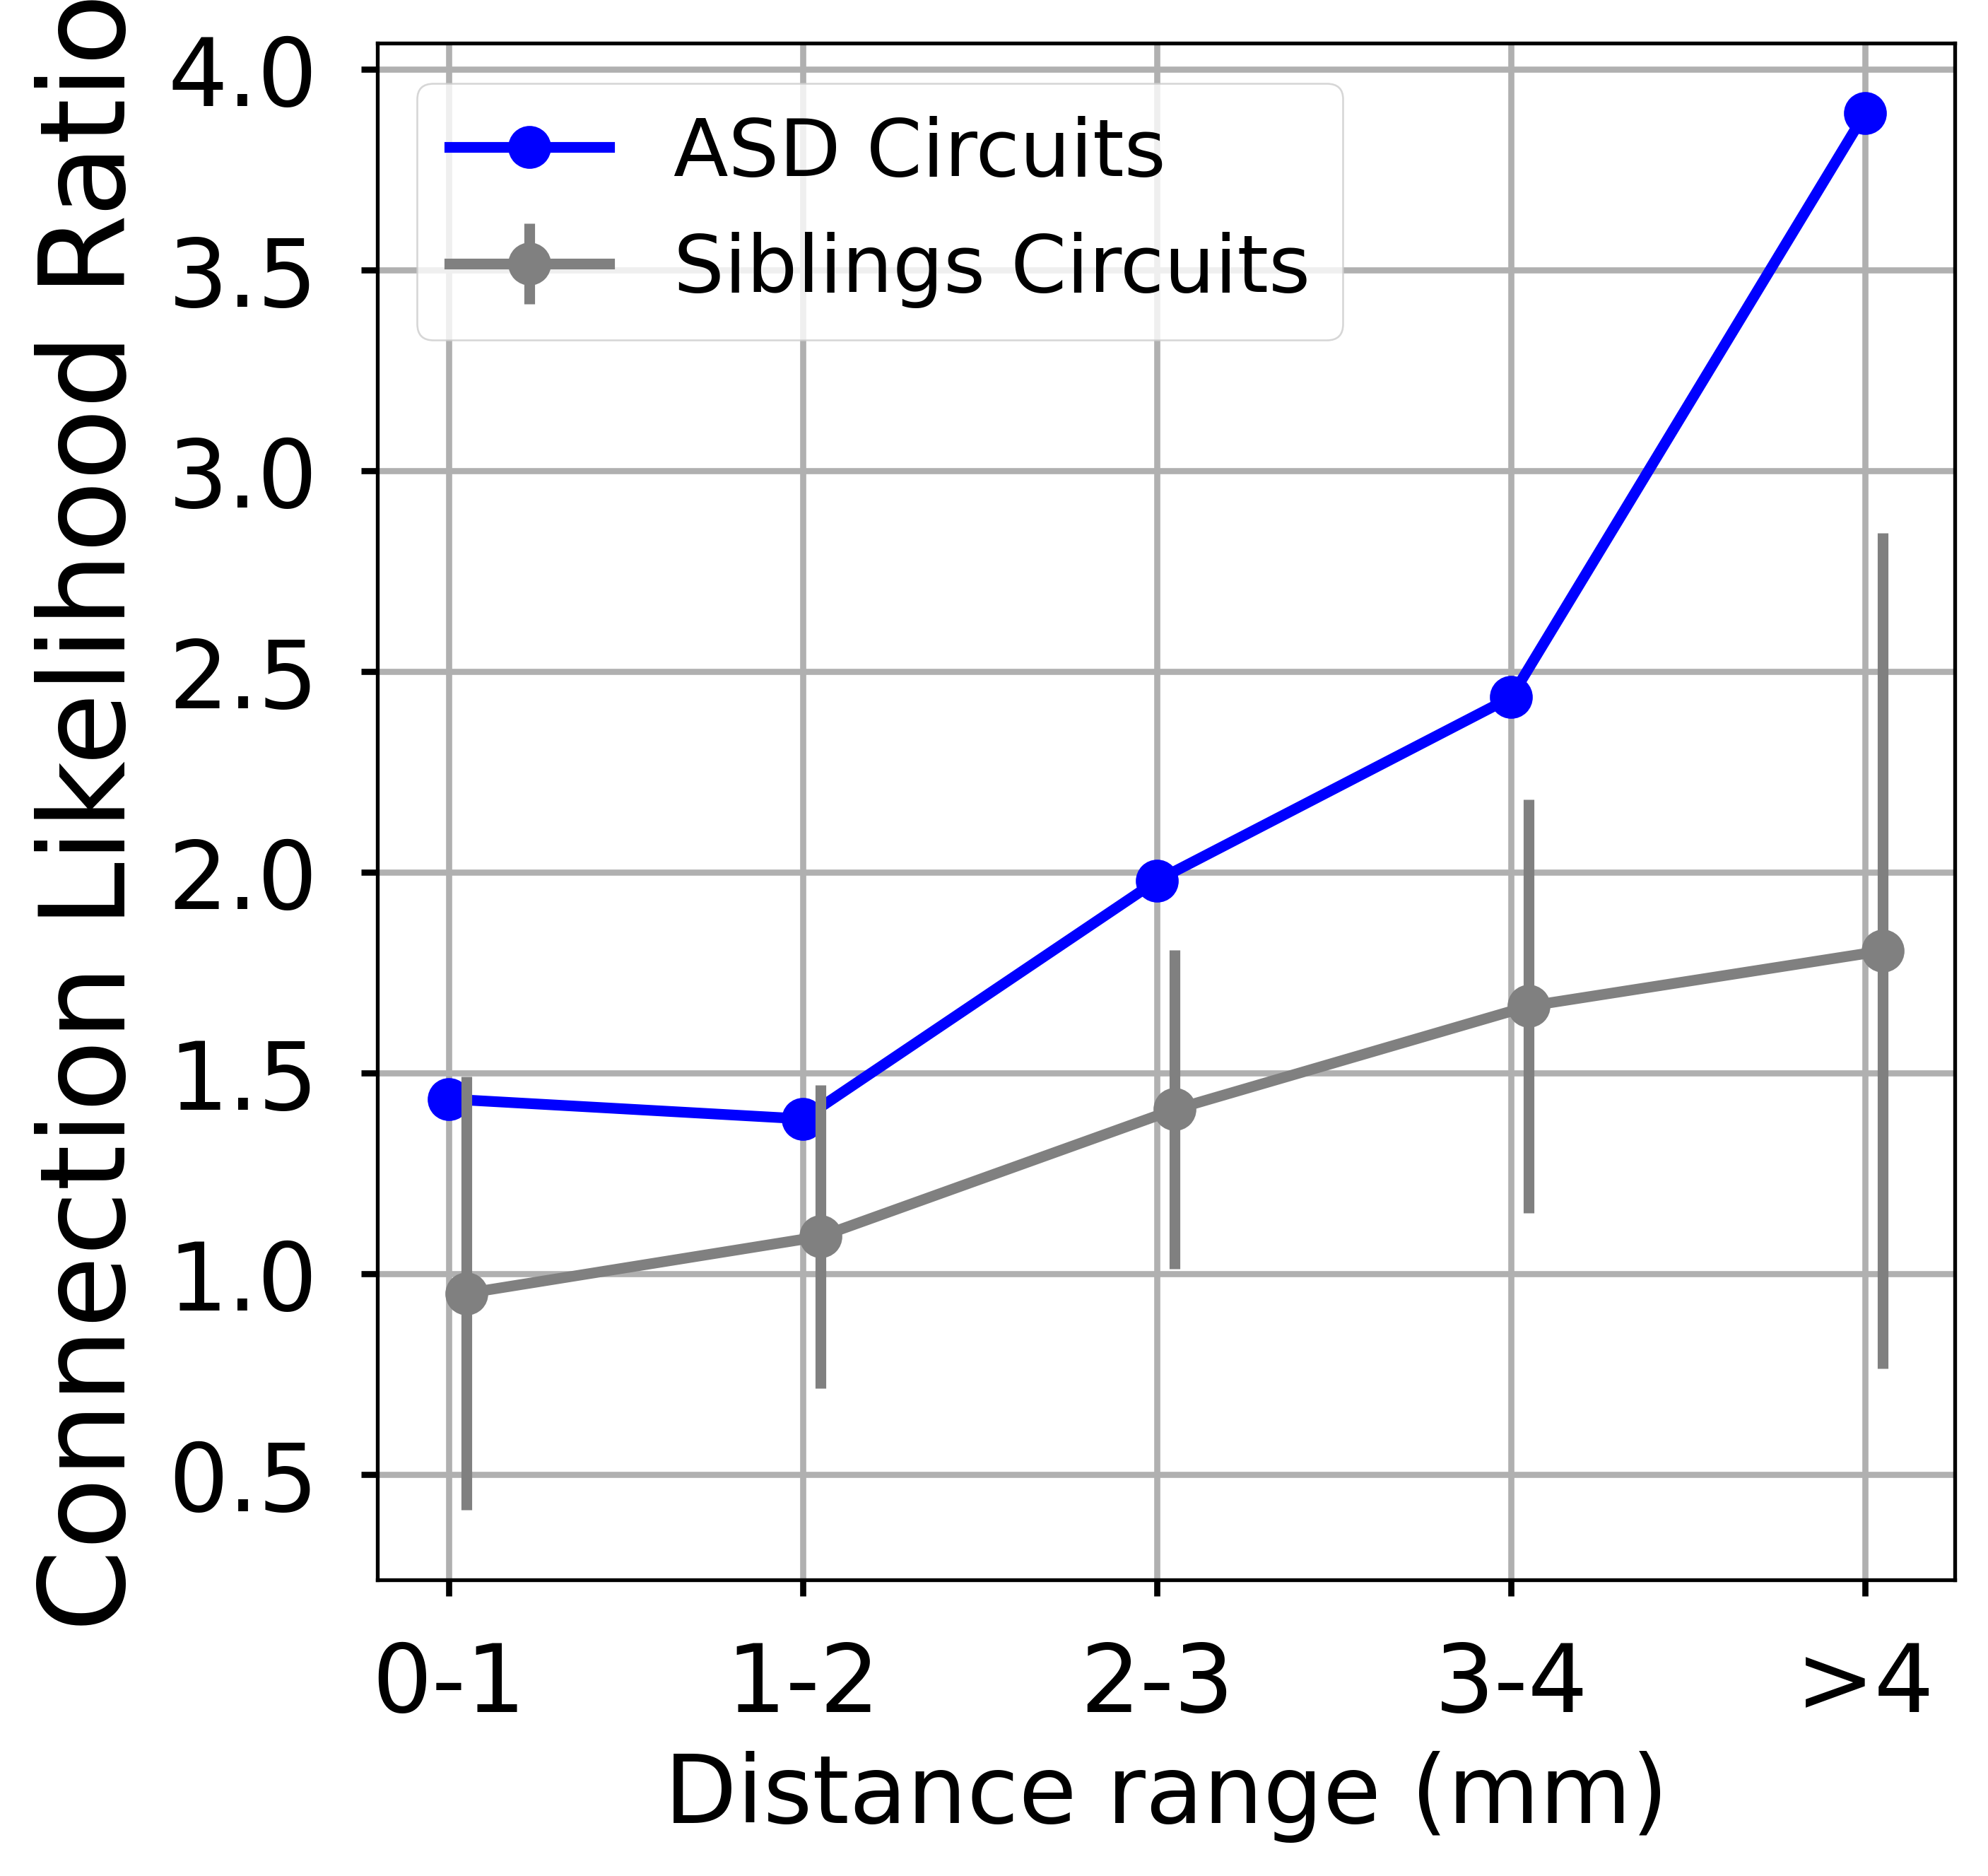

In [38]:
fig, ax = plt.subplots(dpi=480, figsize=(6,6))
norm = N_Connections_total/N_Pairs_total
ax.plot(np.arange(5), ASD_Connections/ASD_Pairs / norm , marker="o" , color="blue", label="ASD Circuits")
#ax.plot(np.arange(6) + 0.05, SIB_Connections/SIB_Pairs / norm, marker="o", color="orange", label="Sibling Circuits")
ax.errorbar(np.arange(5) + 0.05, 
                 subsib_conns_mean/subsib_pairs_mean / norm, 
                 yerr= np.nanstd(subsib_connections/subsib_Pairs/norm, axis=0),
                 marker="o", color="grey", label="Siblings Circuits")

ax.grid(True)
ax.legend(loc="upper left", fontsize=17)
ax.set_ylabel("Connection Likelihood Ratio", fontsize=25)
ax.set_xlabel(r"Distance range (mm)", fontsize=20)
#ax.set_xticklabels(["", "0-1", "1-2", "2-3", "3-4", "4-5", r">5"], fontsize=20)
ax.set_xticklabels(["", "0-1", "1-2", "2-3", "3-4", r">4"], fontsize=20)
ax.tick_params(axis='y', labelsize=20)
#plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%s x1000'))
#plt.tight_layout()
plt.show()

/tmp/ipykernel_2186557/2088884313.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["", "0-1", "1-2", "2-3", "3-4", r">4"], fontsize=20)


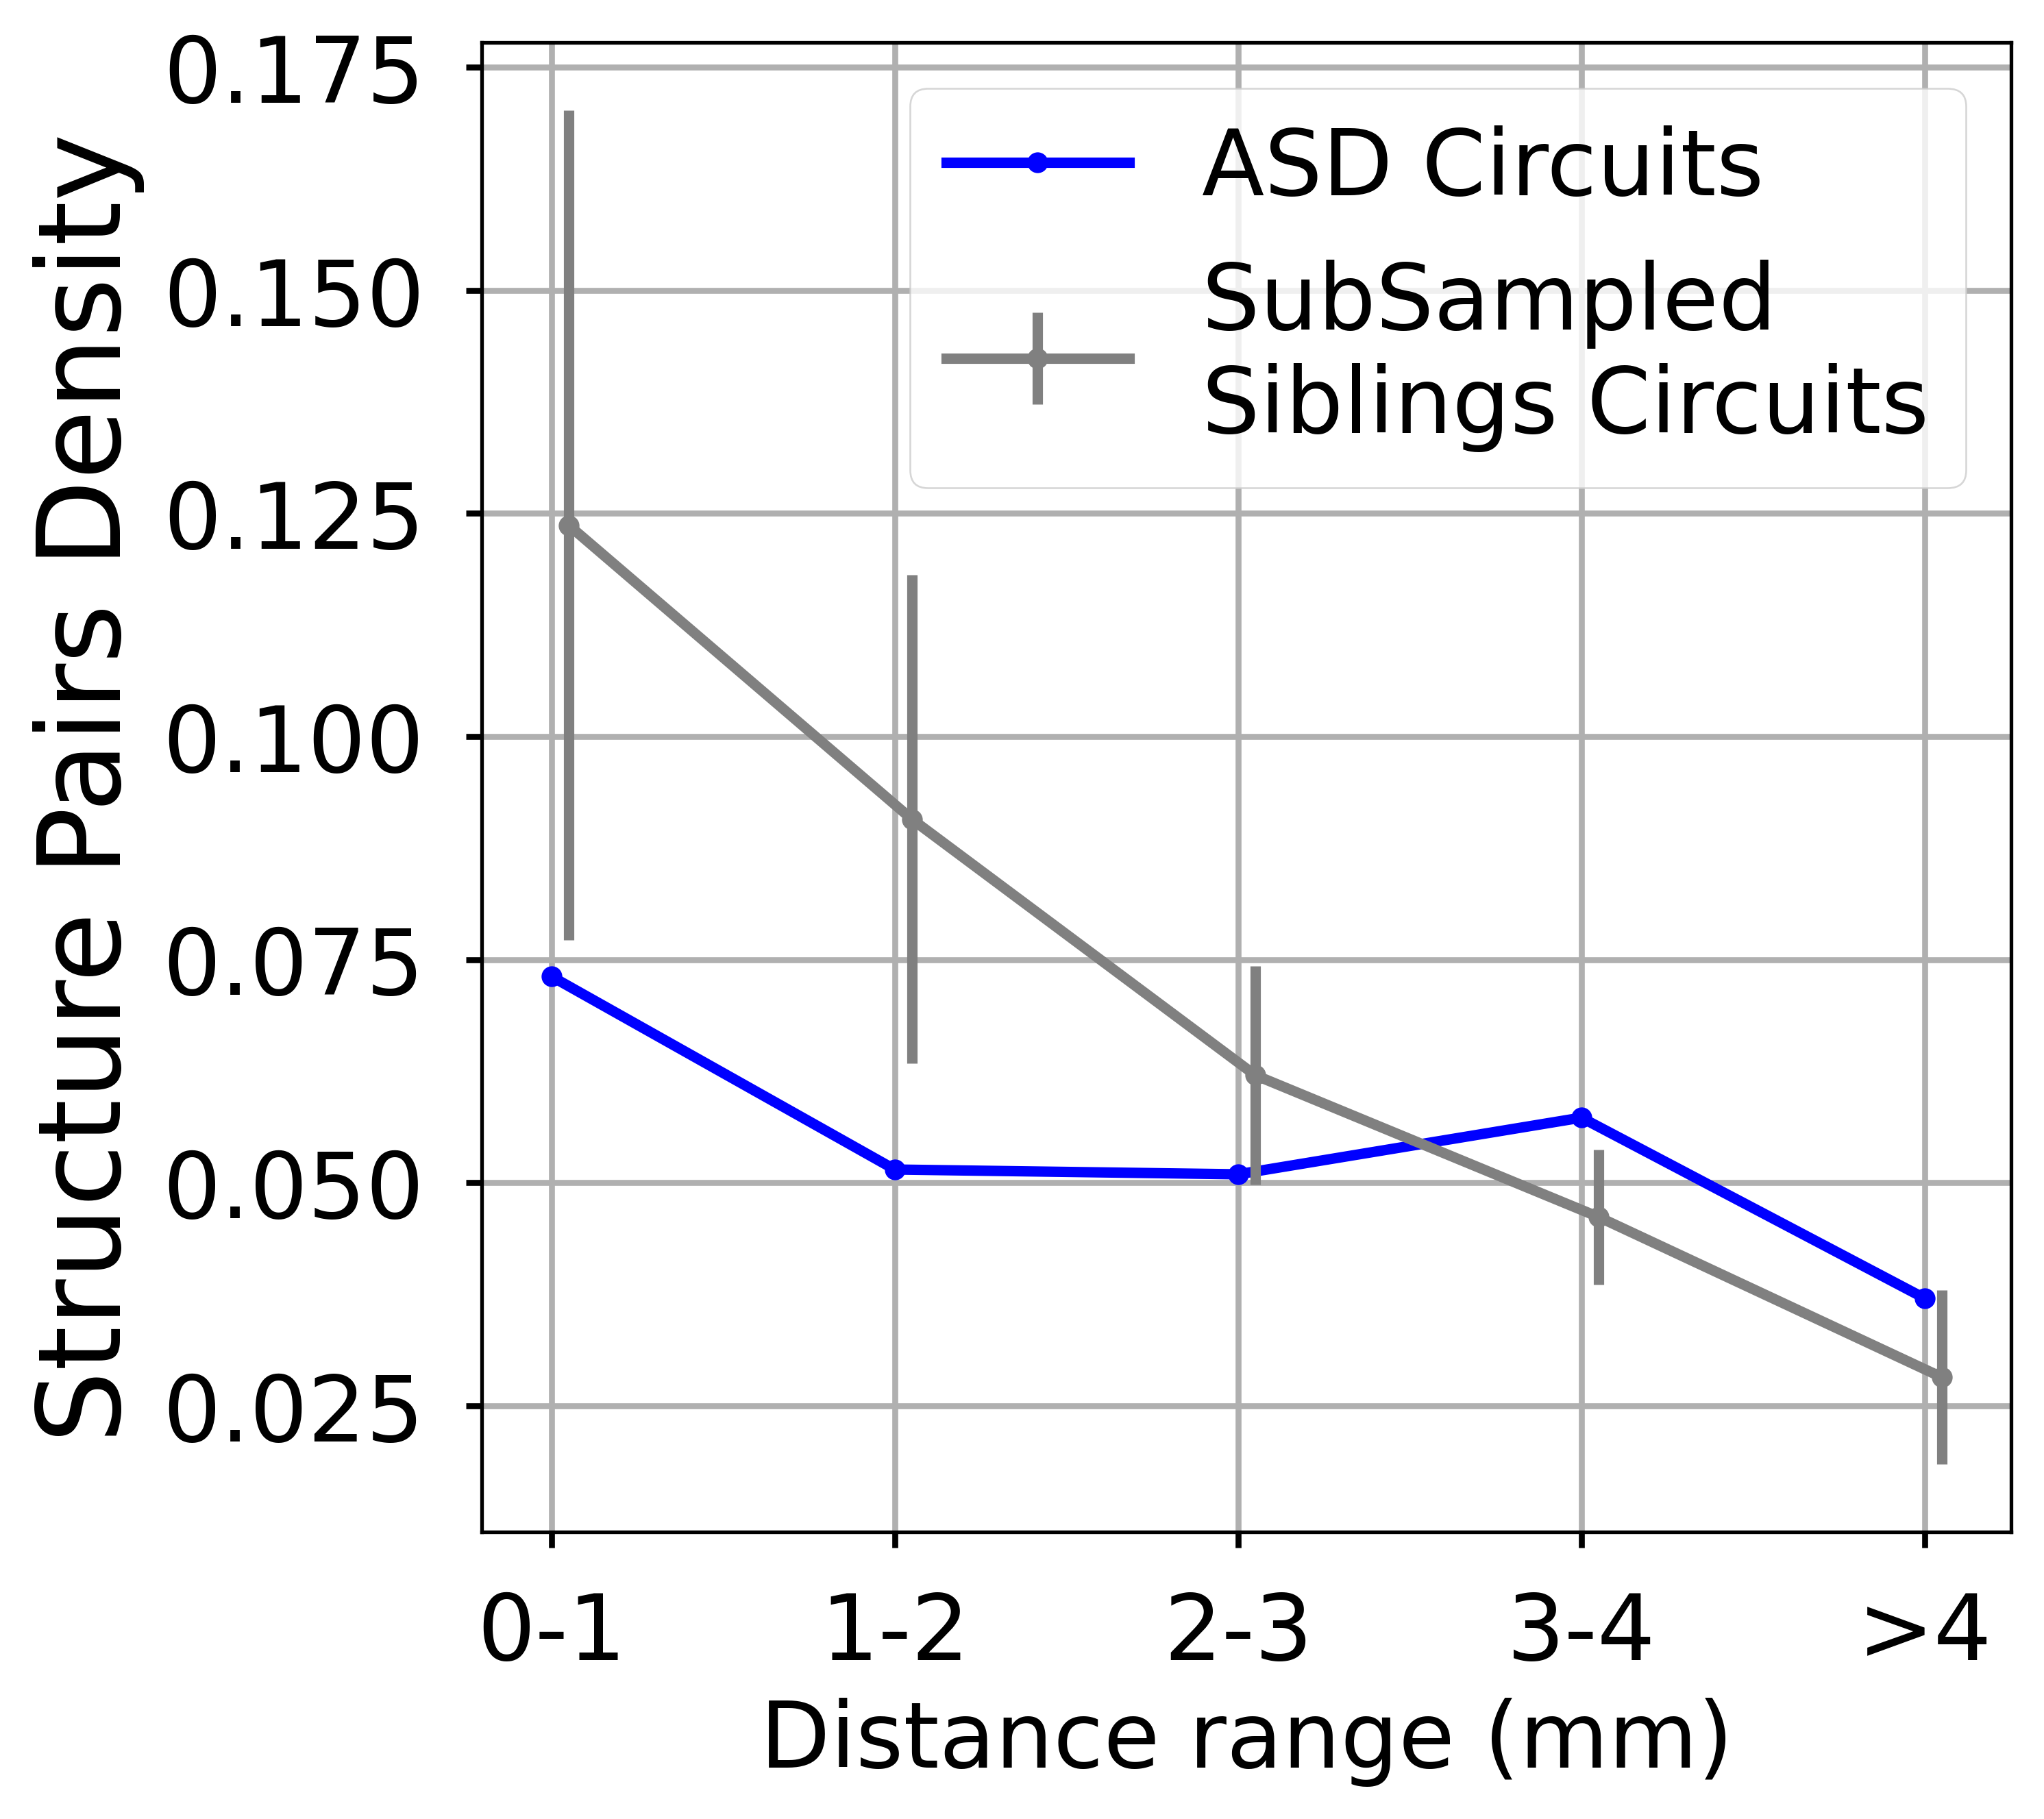

In [39]:
fig, ax = plt.subplots(dpi=480, figsize=(6,6))
ax.plot(np.arange(5), ASD_Pairs/N_Pairs_total, marker="." , color="blue", label="ASD Circuits")
#ax.plot(np.arange(6) + 0.05, SIB_Pairs/N_Pairs_total, marker=".", color="orange", label="Sibling Circuits")
ax.errorbar(np.arange(5) + 0.05, 
                 subsib_pairs_mean/N_Pairs_total, 
                 yerr= np.nanstd(subsib_Pairs/N_Pairs_total, axis=0),#subsib_pairs_std/N_Pairs_total,
                 marker=".", color="grey", label="SubSampled \nSiblings Circuits")

ax.grid(True)
ax.legend(loc="upper right", fontsize=20)
ax.set_ylabel("Structure Pairs Density", fontsize=25)
ax.set_xlabel(r"Distance range (mm)", fontsize=20)
#ax.set_xticklabels(["", "0-1", "1-2", "2-3", "3-4", "4-5", r">5"], fontsize=20)
ax.set_xticklabels(["", "0-1", "1-2", "2-3", "3-4", r">4"], fontsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.legend(fontsize=20)
